## Convenciones

In [487]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import scipy.stats as st
import scipy as sc
import geopandas as gp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Opcion 3 de item 1b
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

#Item 1c
from sklearn.neighbors import LocalOutlierFactor

#Item 1d
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

In [488]:
import matplotlib.font_manager

In [489]:
df = pd.read_csv("./data/properati_argentina_2021.csv")

In [490]:
df.head(10)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell
5,F9tamlHF5c8kGM6XRTsCKQ==,2021-09-09,2022-01-27,2021-09-09,-34.859680,-56.195410,Montevideo,NaN,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,54.0,54.0,189900.0,USD,Apartamento - Prado
6,NqZ7NCaGZKarCdU/V0vHfw==,2021-09-09,2021-09-14,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,5.0,3.0,294.0,254.0,249000.0,USD,Casa - Los Cardales
7,gRTl4HxCqiGIwGRq0r1oag==,2021-09-09,2022-01-05,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,7.0,3.0,462.0,308.0,460000.0,USD,Casa - Los Cardales
8,Y8n0DpI7wgglQ6QISaTB4g==,2021-09-09,2021-09-10,2021-09-09,-34.901935,-56.183708,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Departamento,5.0,2.0,60.0,60.0,26760.0,UYU,Apartamento - Cordón
9,HMt6tiEI+xILu5W6cjGdiw==,2021-09-09,2021-10-28,2021-09-09,-34.866268,-56.092273,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Casa,5.0,2.0,70.0,70.0,19000.0,UYU,Casa - Carrasco Norte


In [491]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


## Selección de datos

##### Removemos columnas que estamos seguros de que no se van a utilizar

In [492]:
df.drop(['id', 'start_date', 'end_date', 'created_on'], axis=1, inplace=True)

##### Filtramos la ubicación para quedarnos con las ubicaciones que están en Capital Federal únicamente

In [493]:
df_filtrado = df.query("place_l2 == 'Capital Federal'")

##### Verificamos que efectivamente exista solo Capital Federal

In [494]:
df_filtrado['place_l2'].unique()

array(['Capital Federal'], dtype=object)

##### Filtramos property_type por vivienda: Casa, Depto y PH

In [495]:
df_filtrado = df_filtrado.query("property_type == 'Casa' or property_type == 'PH' or property_type == 'Departamento'")
df_filtrado.property_type.unique()

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [496]:
pd.crosstab(index=df_filtrado['property_type'], columns=df_filtrado['property_currency'], margins=True)

property_currency,ARS,USD,All
property_type,,,
Casa,281,4339,4620
Departamento,29485,86709,116194
PH,1140,9354,10494
All,30906,100402,131308


##### Filtramos por tipo de operación: venta

In [497]:
df_filtrado = df_filtrado.query("operation == 'Venta'")
df_filtrado['operation'].value_counts()

Venta    95543
Name: operation, dtype: int64

##### Filtramos y nos quedamos con las propiedades que tienen el precio en dólares

In [498]:
df_filtrado = df_filtrado[df_filtrado['property_currency'] == "USD"]
df_filtrado.property_currency.unique()

array(['USD'], dtype=object)

##### Luego de filtrar por tipo de operación y moneda, podemos eliminar estas columnas ya que tendrán un único valor

In [499]:
df_filtrado.drop(['operation', 'property_currency'], axis=1, inplace=True)

##### Dado que no hay información respecto a las columnas l5 y l6, revisamos que tipo de datos tienen

In [500]:
df_filtrado["place_l5"].value_counts()

Series([], Name: place_l5, dtype: int64)

In [501]:
df_filtrado["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

##### Como vemos que ambas columnas están vacías, podemos dropearlas del dataframe

In [502]:
#Hacemos la limpieza de todos los place_lx que no vamos a utilizar. Sacamos place_l2 dado que es en todos los casos Capital Federal, place_l4 dado que hay pocos barrios disponibles y

df_filtrado.drop(['place_l2','place_l4', 'place_l5', 'place_l6'], axis=1, inplace=True)

##### Removemos registros duplicados

In [503]:
size_antes = len(df_filtrado)
df_filtrado = df_filtrado.drop_duplicates()
size_despues = len(df_filtrado)
print(f'Se eliminaron: {size_antes-size_despues} filas duplicadas')

Se eliminaron: 11315 filas duplicadas


In [504]:
#Reseteamos los indices
df_filtrado.reset_index(drop=True, inplace=True)

In [505]:
#Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).
df_train, df_test = train_test_split(df_filtrado,
                                     test_size=0.2, # proporcion 80/20
                                     random_state=2) #semilla random

## Ejercicio 1a: exploración inicial

### Tipo de variable

In [506]:
df_filtrado.dtypes

latitud                     float64
longitud                    float64
place_l3                     object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_title               object
dtype: object

### Variables Cuantitativas

In [507]:
#variables cuantitativas, media
df_filtrado.mean()

latitud                        -34.591420
longitud                       -58.451360
property_rooms                   2.813027
property_bedrooms                2.010671
property_surface_total         107.142274
property_surface_covered        87.764452
property_price              214529.979393
dtype: float64

In [508]:
# variables cuantitativas, mediana
df_filtrado.median()

latitud                        -34.596220
longitud                       -58.439412
property_rooms                   3.000000
property_bedrooms                2.000000
property_surface_total          65.000000
property_surface_covered        57.000000
property_price              140000.000000
dtype: float64

In [509]:
# variables cuantitativas, q1
df_filtrado.quantile(0.25)

latitud                       -34.616573
longitud                      -58.466992
property_rooms                  2.000000
property_bedrooms               1.000000
property_surface_total         45.000000
property_surface_covered       40.000000
property_price              95000.000000
Name: 0.25, dtype: float64

In [510]:
# variables cuantitativas, q3
df_filtrado.quantile(0.75)

latitud                        -34.577592
longitud                       -58.409158
property_rooms                   4.000000
property_bedrooms                3.000000
property_surface_total         103.000000
property_surface_covered        87.000000
property_price              230000.000000
Name: 0.75, dtype: float64

In [511]:
# variables cuantitativas, moda
df_filtrado.mode()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.604538,-58.424956,Palermo,Departamento,3.0,1.0,50.0,40.0,110000.0,Departamento - Palermo


### Variables Cualitativas: cantidad de valores posibles, y frecuencias de cada uno.

Análisis de la variable place_l3 (ciudades) como un gráfico de barras, comparando su frecuencia

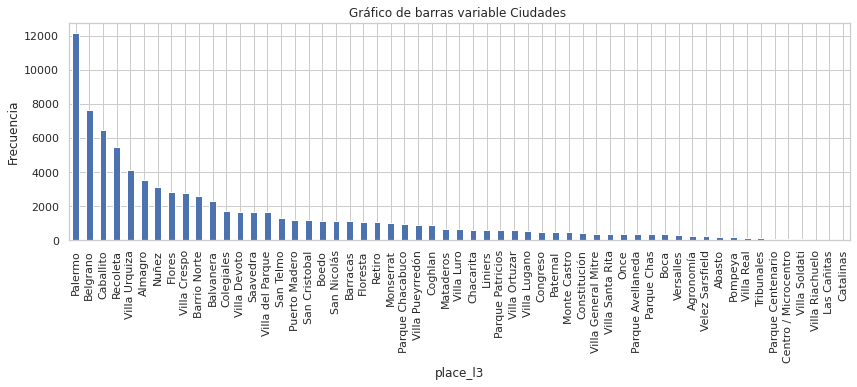

In [512]:
grafico_ciudades = df_filtrado['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Ciudades " , xlabel="place_l3" , ylabel="Frecuencia") 

Gráfico de barras de los barrios, agrupando los barrios menos frecuentes (desde el 5) como "Otros".

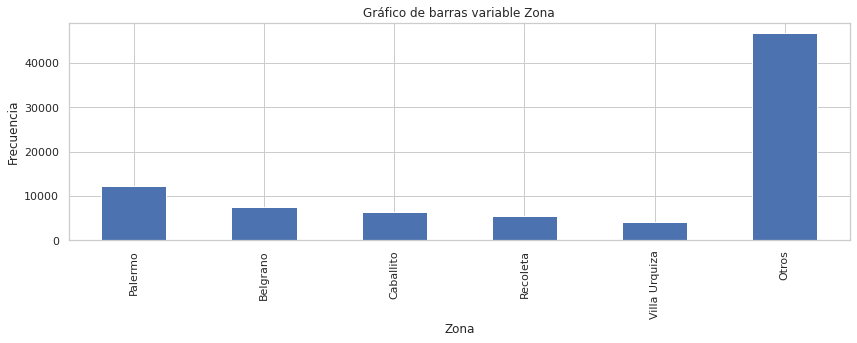

In [513]:
datos_ciudades = df_filtrado['place_l3'].value_counts()[:5]
datos_ciudades['Otros'] = df_filtrado['place_l3'].value_counts()[5:].sum()
grafico_ciudades = datos_ciudades.plot.bar(alpha=1 , title="Gráfico de barras variable Zona" , xlabel="Zona" , ylabel="Frecuencia") 

In [514]:
df_filtrado["property_type"].value_counts()

Departamento    70734
PH               8423
Casa             3777
Name: property_type, dtype: int64

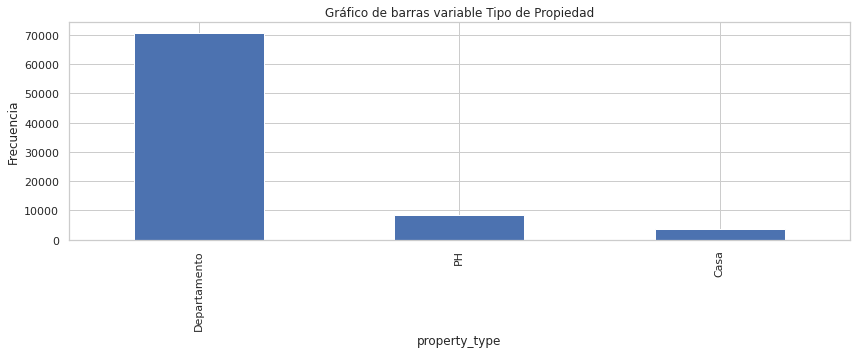

In [515]:
grafico_propiedades = df_filtrado['property_type'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

In [516]:
df_filtrado["property_title"].value_counts()

Departamento - Palermo                                                                                  1166
Departamento - Recoleta                                                                                 1149
Departamento - Belgrano                                                                                 1006
Departamento - Caballito                                                                                 837
Departamento - Almagro                                                                                   554
                                                                                                        ... 
Venta Caballito Departamento de 2 ambientes                                                                1
MONOAMBIENTE CON BALCON AMENITIES IMPECABLE                                                                1
MUY LINDO Y LUMINOSO DEPARTAMENTO EN LA CALLE SANTIAGO DEL ESTERO AL 200 - MONSERRAT                       1
VENTA OFICINA 5 AMB

In [517]:
df_filtrado["property_title"].value_counts().size

55704

Se observa que hay 55784 diferentes títulos publicados, por lo que se mostrarán los 9 más frecuentes y los demás serán agrupados como otros

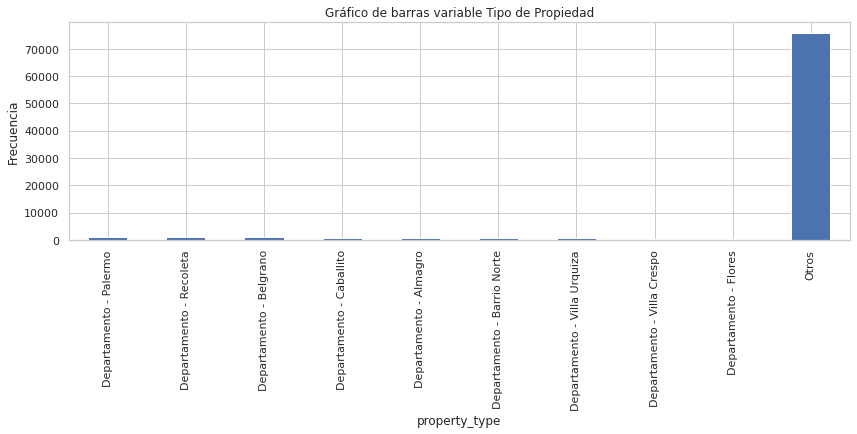

In [518]:
titulo_propiedades = df_filtrado['property_title'].value_counts()[:9]
titulo_propiedades['Otros'] = df_filtrado['property_title'].value_counts()[10:].sum()
grafico_titulo_propiedades = titulo_propiedades.plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

### Realizar un análisis gráfico de las distribuciones de las variables

array([[<AxesSubplot:xlabel='latitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='latitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='longitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='property_rooms'>,


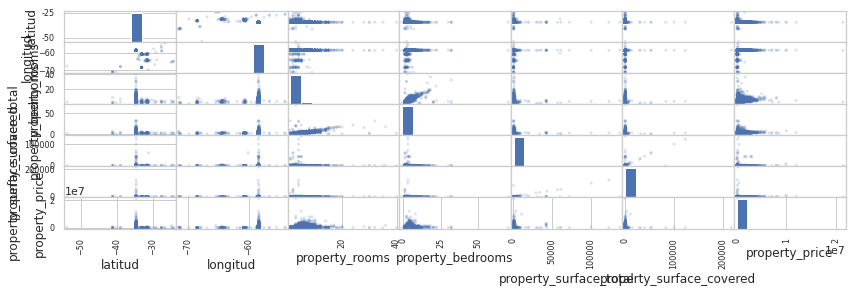

In [519]:
columns=df_filtrado.columns.tolist()
ds_scatter_matrix=df_filtrado[columns].copy()
scatter_matrix(ds_scatter_matrix, alpha=0.2)

### Analizar las correlaciones existentes entre las variables

Para el análisis de las correlaciones entre variables, se optó por el uso de la matriz de correlación. Además de un heatmap complementario con dichos valores, que es más atractivo visualmente dado que los colores permiten a simple vista ver las mayores correlaciones.

In [520]:
df_filtrado.drop(['latitud', 'longitud'],axis=1).corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
property_rooms,1.000000,0.867570,0.066404,0.068973,0.478719
property_bedrooms,0.867570,1.000000,0.062599,0.067828,0.429173
property_surface_total,0.066404,0.062599,1.000000,0.629899,0.083685
property_surface_covered,0.068973,0.067828,0.629899,1.000000,0.050078
property_price,0.478719,0.429173,0.083685,0.050078,1.000000


<AxesSubplot:>

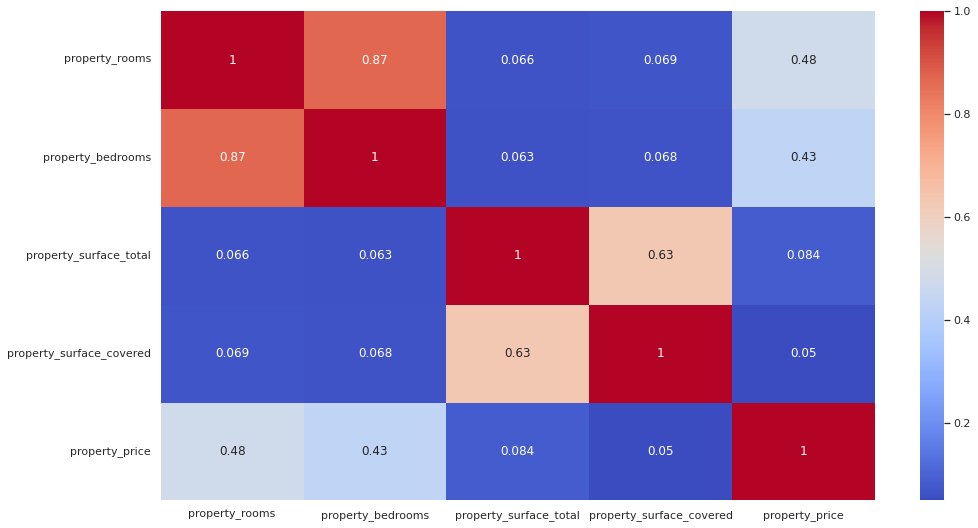

In [521]:

plt.figure(figsize = (16,9))
sns.heatmap(df_filtrado.drop(['latitud', 'longitud'], axis=1).corr(), annot = True, cmap='coolwarm')

Se observa que hay una fuerte relacion entre la cantidad de habitaciones y ambientes disponibles en una propiedad. Asi como tambien, como es predecible, la superficie cubierta, y la total cubierta estan relacionadas entre si, aunque no tanto como en la relacion entre habitaciones y ambientes.

### Conclusiones sobre los datos

En conclusión de las variables cualitativas la mayor frecuencia de inmobiliario en venta son departamentos, mayormente ubicados en Palermo.


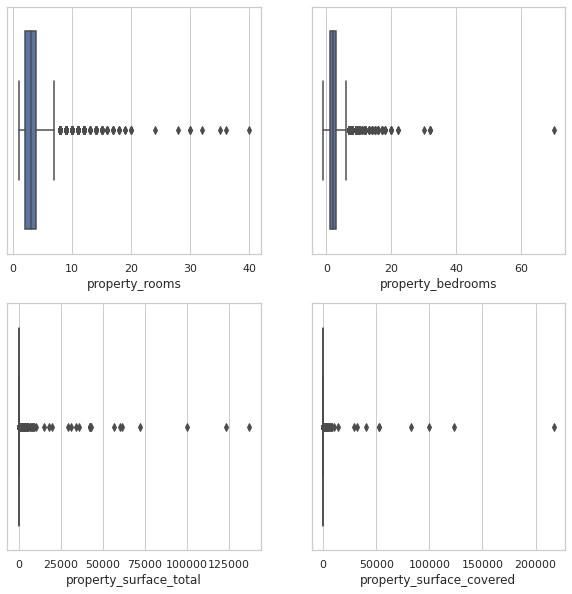

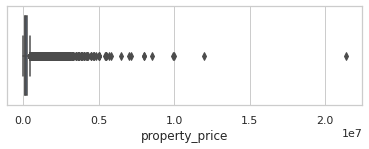

In [522]:
plt.figure(figsize=(10,10))
      
plt.subplot(221)
sns.boxplot(x="property_rooms", data=df_filtrado)
  
plt.subplot(222)
sns.boxplot(x="property_bedrooms", data=df_filtrado)
  
plt.subplot(223)
sns.boxplot(x="property_surface_total", data=df_filtrado)
  
plt.subplot(224)
sns.boxplot(x="property_surface_covered", data=df_filtrado)

plt.show()

plt.subplot(221)
sns.boxplot(x="property_price", data=df_filtrado)
plt.show()

Se puede ver que los distintos valores en las columnas contienen outliers por lo que la media, la mediana y los cuartiles pueden ser valores falsos.

Por ultimo con las correlaciones podemos ver que hay una bastante relación entre la cantidad de habitaciones y ambientes disponibles en una propiedad, así como también hay una relación considerablemente alta con superficie cubierta y la superficie total.

## Ejercicio 1b: Preprocesamiento

In [523]:
filas_totales=df_filtrado.shape[0]
print(df_filtrado.isna().sum()/filas_totales*100)

latitud                      3.871753
longitud                     3.871753
place_l3                     0.478694
property_type                0.000000
property_rooms               1.163576
property_bedrooms           11.863651
property_surface_total       5.130586
property_surface_covered     3.485904
property_price               0.000000
property_title               0.000000
dtype: float64


### Análisis de datos faltantes a nivel de fila

In [524]:
df_filas_nan = df_filtrado[df_filtrado.isna().any(axis=1)]
len(df_filas_nan)

18819

Se observan que hay 81088 filas con datos faltantes

In [525]:
(len(df_filas_nan)/len(df_filtrado))*100


22.691537849374203

De los cuales representan el 97.72% de las observaciones totales del dataset

In [526]:
#filas_muy_faltantes = filas_faltantes[filas_faltantes > 34]
#filas_muy_faltantes.size/filas_faltantes.size*100
# Filtramos filas con 4 o más valores nulos
df_filas_nan_4 = df_filas_nan.dropna(thresh=df_filas_nan.shape[1]-4)
(len(df_filas_nan_4)/len(df_filas_nan))*100

99.48456347308571

Además, se observa que menos del 1% de dichas filas con campos faltantes, tienen más del 33% de sus campos con datos faltantes, que representarían más de 4 campos.

<AxesSubplot:title={'center':'Gráfico de barras variables faltantes por filas'}, xlabel='Variables', ylabel='Porcentaje'>

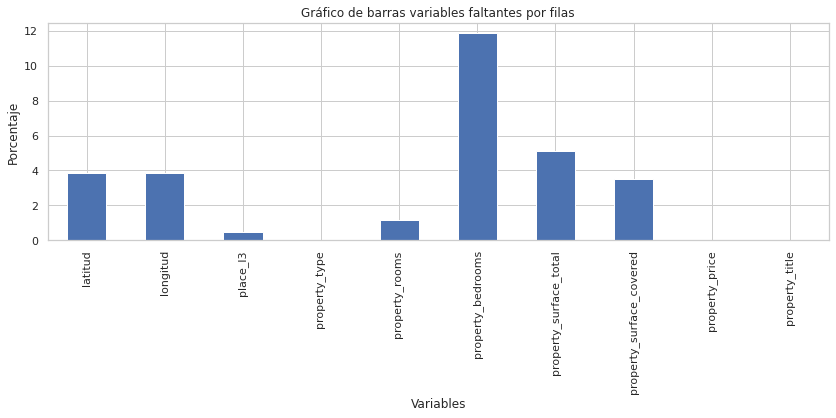

In [527]:
#Gráfico
(df_filtrado.isna().sum()/filas_totales*100).plot.bar(alpha=1 , title="Gráfico de barras variables faltantes por filas" , xlabel="Variables" , ylabel="Porcentaje")

Con este gráfico se puede observar que al menos 70.000 filas tienen un 8% de datos nulos

### Analisis de datos faltantes a nivel de columna

In [528]:
columnas_totales=df_filtrado.shape[0]
columnas_faltantes = df_filtrado.isnull().sum(axis=0)/columnas_totales*100
columnas_faltantes = columnas_faltantes[columnas_faltantes > 0]
columnas_faltantes.size


7

Se observan que hay 8 columnas con datos faltantes.

In [529]:
columnas_faltantes.size/df_filtrado.shape[1]*100

70.0

El 66,67% de las columnas totales del dataset

In [530]:
columnas_muy_faltantes = columnas_faltantes[columnas_faltantes > 34]
columnas_muy_faltantes.size/columnas_faltantes.size*100

0.0

El 12,5% de las columnas con datos faltantes tiene mas del 33% de sus campos con datos faltantes. 

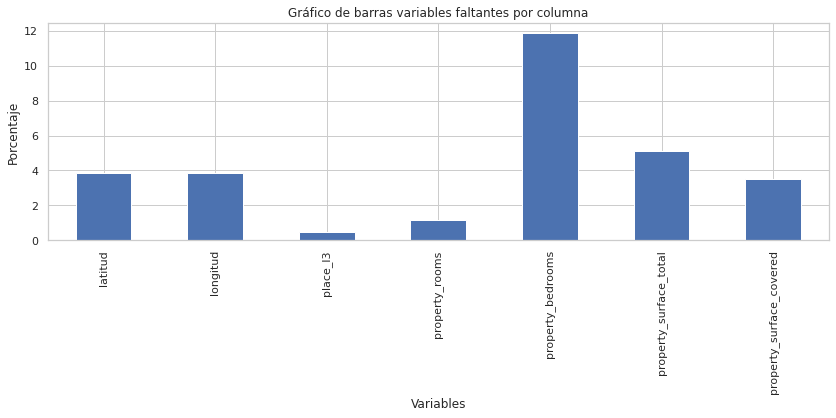

In [531]:
#Gráfico

grafico_col_faltantes = columnas_faltantes.plot.bar(alpha=1 , title="Gráfico de barras variables faltantes por columna" , xlabel="Variables" , ylabel="Porcentaje") 

Gracias a este gráfico podemos saber que la columna con más datos faltantes es 'place_l4'

### Estrategias para reparar valores faltantes

Opción 0: eliminarlos del dataset

In [532]:
df_eliminar_nans_0 =  df_filtrado.copy()
df_eliminar_nans_0.dropna(inplace=True)
df_eliminar_nans_0.shape
df_eliminar_nans_0.isnull().sum()

latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

In [533]:
df_eliminar_nans_0.shape[0]/df_filtrado.shape[0]*100

77.3084621506258

Se observa que de esta forma, al eliminar todas las filas con NA's, sobrevivió sólo menos del 3% de las observaciones originales.

Opción 1: tratar los NaNs como su propia categoria o valor

In [534]:
df_eliminar_nans_1=df_filtrado.copy()
df_eliminar_nans_1['latitud'] =df_eliminar_nans_1['latitud'].fillna(999999999) #999999999 = no existe
df_eliminar_nans_1['longitud'] = df_eliminar_nans_1['longitud'].fillna(999999999)
df_eliminar_nans_1['place_l3'] = df_eliminar_nans_1['place_l3'].fillna("Ciudad no existe")
df_eliminar_nans_1['property_rooms'] = df_eliminar_nans_1['property_rooms'].fillna(-1) #-1 para decir que esta vacío
df_eliminar_nans_1['property_bedrooms'] = df_eliminar_nans_1['property_bedrooms'].fillna(-1)
df_eliminar_nans_1['property_surface_total'] = df_eliminar_nans_1['property_surface_total'].fillna(-1)
df_eliminar_nans_1['property_surface_covered'] = df_eliminar_nans_1['property_surface_covered'].fillna(-1)
df_eliminar_nans_1.isnull().sum()


latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

Se categorizan latitud y longitud con 999999999 para entender que es una variable que no existe en el dataset

Luego 'place_l3' es modificado con la categoría "ciudad no existen" 

Finalmente los valores 'property' se modifican creando la categoría -1 por lo mismo mencionado

Opción 2: completar usando información de esa columna (Univariadas)

In [535]:
df_eliminar_nans_2 = df_filtrado.copy()

# completar con la mediana, promedio, moda o constante

# Devuelve el valor de imputacion de las tres estrategias para esa columna
def mostrat_estrategias(df, nombre_col, k=99):
    _df = df[[nombre_col]].copy()
    s = df[nombre_col]

    _df['mediana'] = s.fillna(s.median())
    _df['media'] = s.fillna(s.mean())
    _df['moda'] = s.fillna(s.mode()[0])
    _df['constante'] = k

    return _df[s.isna()]

# ejemplo utilizando columna property_bedrooms
mostrat_estrategias(df_eliminar_nans_2, 'property_bedrooms', 99)

,property_bedrooms,mediana,media,moda,constante
37,NaN,2.0,2.010671,1.0,99
39,NaN,2.0,2.010671,1.0,99
47,NaN,2.0,2.010671,1.0,99
50,NaN,2.0,2.010671,1.0,99
56,NaN,2.0,2.010671,1.0,99
...,...,...,...,...,...
82888,NaN,2.0,2.010671,1.0,99
82894,NaN,2.0,2.010671,1.0,99
82900,NaN,2.0,2.010671,1.0,99
82922,NaN,2.0,2.010671,1.0,99


Opción 3: completar usando info de las demas columnas (Multivariadas)

In [536]:
columnas = ['place_l3','latitud', 'longitud', 'property_bedrooms','property_rooms', 'property_surface_total', 
            'property_surface_covered']
df_eliminar_nans_3=df_filtrado[columnas].copy()
df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].fillna("Ciudad no existe")

# Creo diccionario asignandole a cada ciudad (valor) una clave numerica aplicando el método Label Encoder
class_mapping_ciudad = {label:idx for idx, label in enumerate(np.unique(df_eliminar_nans_3['place_l3']))}
class_mapping_ciudad['Ciudad no existe'] = np.nan # reemplazo en el df 'Ciudad no existe' por nan

# Cabio los valores por sus claves numericas asociadas
df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].map(class_mapping_ciudad)

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, 
                        min_value = [df_eliminar_nans_3['place_l3'].min(), -np.inf, -np.inf,-np.inf, -np.inf, -np.inf, -np.inf],
                        max_value = [df_eliminar_nans_3['place_l3'].max(), np.inf, np.inf,np.inf, np.inf, np.inf, np.inf],
                        verbose=0, random_state=0)
df_eliminar_nans_3[:] = imp.fit_transform(df_eliminar_nans_3)

# Vuelvo a pasar a string
inv_class_mapping_ciudad = {v:k for k, v in class_mapping_ciudad.items()}

df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].astype(int).map(inv_class_mapping_ciudad)

df_eliminar_nans_3.isna().sum()

place_l3                    0
latitud                     0
longitud                    0
property_bedrooms           0
property_rooms              0
property_surface_total      0
property_surface_covered    0
dtype: int64

In [537]:
df_eliminar_nans_3['property_bedrooms']

0        3.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
82929    3.0
82930    2.0
82931    1.0
82932    1.0
82933    1.0
Name: property_bedrooms, Length: 82934, dtype: float64

Se observa que ninguna columna tiene valores faltantes

In [538]:
df_eliminar_nans_3.head()

,place_l3,latitud,longitud,property_bedrooms,property_rooms,property_surface_total,property_surface_covered
0,Palermo,-34.589974,-58.459133,3.0,4.0,171.000000,133.0
1,Boca,-34.637319,-58.361124,2.0,3.0,58.000000,55.0
2,Boca,-34.628647,-58.361871,3.0,4.0,70.000000,70.0
3,Once,-34.610027,-58.401934,2.0,4.0,135.327513,104.0
4,Boedo,-34.631621,-58.416825,2.0,4.0,106.415511,73.0


Y que además la variable categórica place_l3 se mantuvo categórica luego de la transformación.

- Elegimos la opción 3, Multivariadas, debido a que utiliza datos ya presentes en el dataset, lo que permite reemplazar los datos faltantes por una prediccion basada en los analisis y observaciones en simultaneo de mas de una variable. Este método es fácil de implementar asi como tambien es efectivo, pudiendo aumentar la cantidad de iteraciones necesarias si creemos necesario mejorar la precision de nuestros resultados. 

### Comparación de distribuciones de cada atributo reparado con distribución previa a la imputación de los datos faltantes

In [539]:
df_previo_eliminar = df_filtrado.copy()
df_filtrado[['place_l3','latitud', 'longitud', 'property_rooms','property_bedrooms', 'property_surface_total', 
            'property_surface_covered']] = df_eliminar_nans_3
#df_filtrado.to_csv("properati_argentina_2021_filtrado.csv")

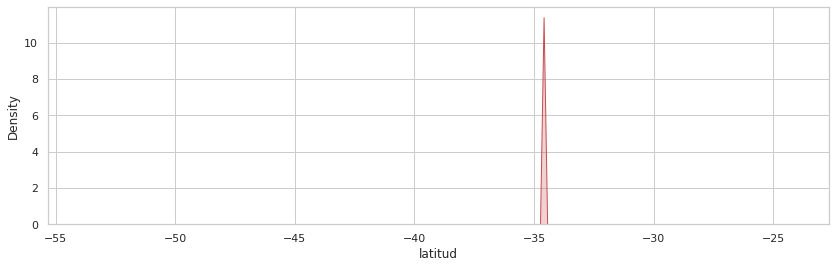

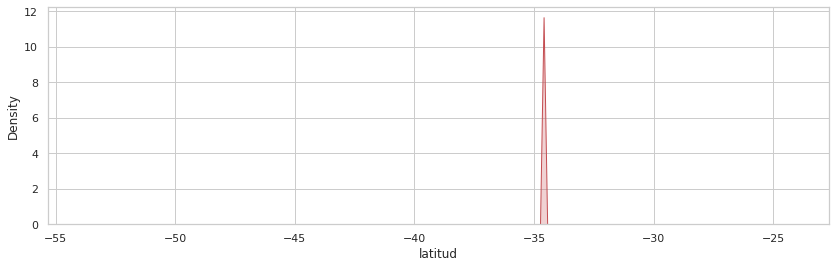

In [540]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['latitud'], shade=True, color="r")
plt.show()

fig = sns.kdeplot(df_filtrado['latitud'], shade=True, color="r")
plt.show()

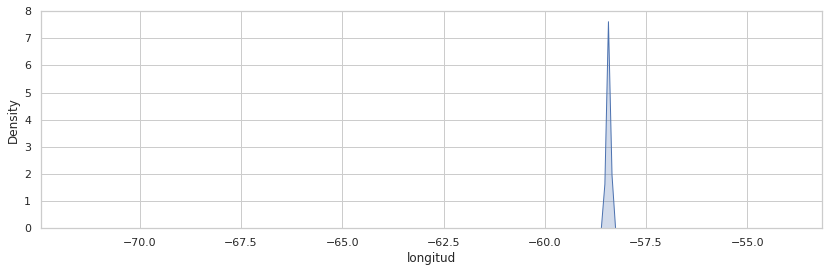

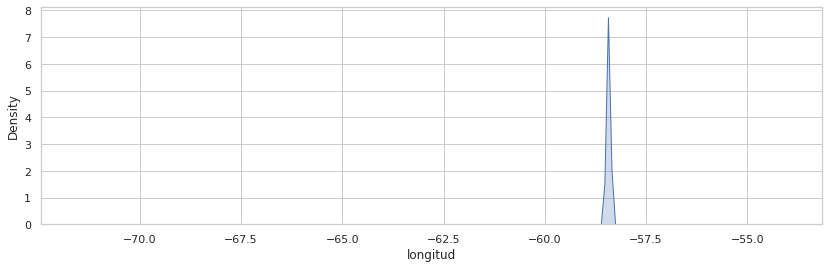

In [541]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['longitud'], shade=True, color="b")
plt.show()

fig = sns.kdeplot(df_filtrado['longitud'], shade=True, color="b")
plt.show()

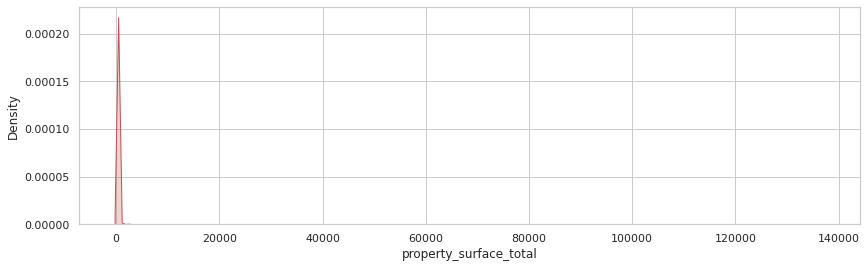

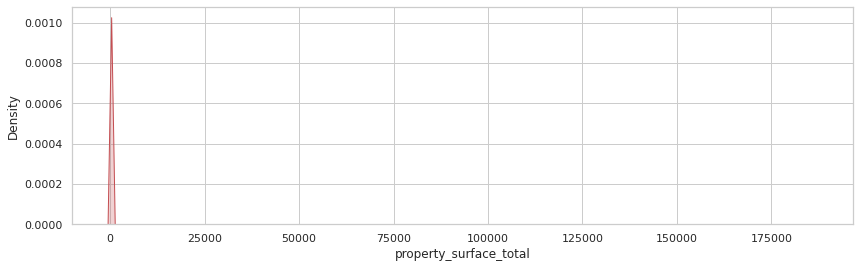

In [542]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_surface_total'], shade=True, color="r")
plt.show()

fig = sns.kdeplot(df_filtrado['property_surface_total'], shade=True, color="r")
plt.show()


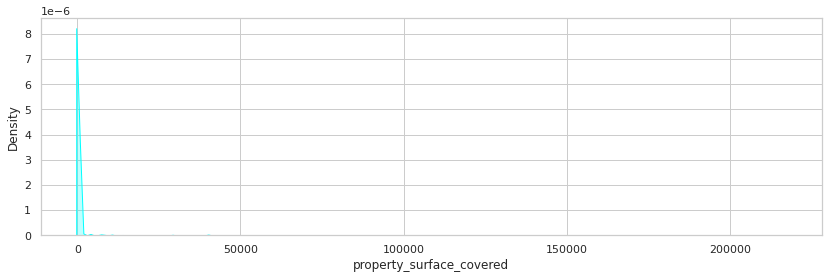

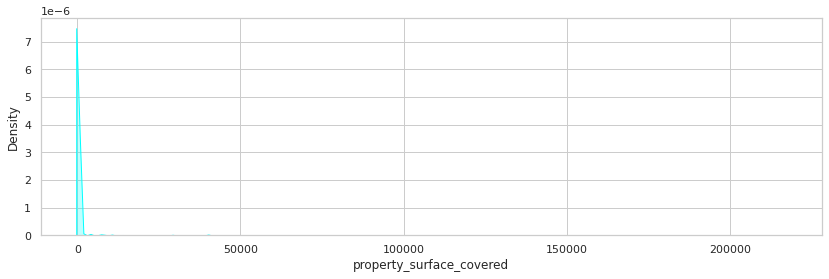

In [543]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_surface_covered'], shade=True, color="aqua")
plt.show()

fig = sns.kdeplot(df_filtrado['property_surface_covered'], shade=True, color="aqua")
plt.show()

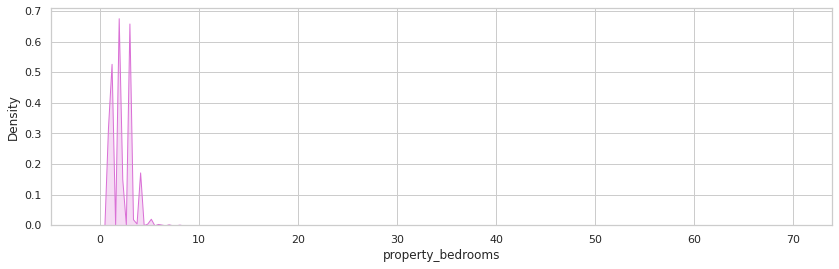

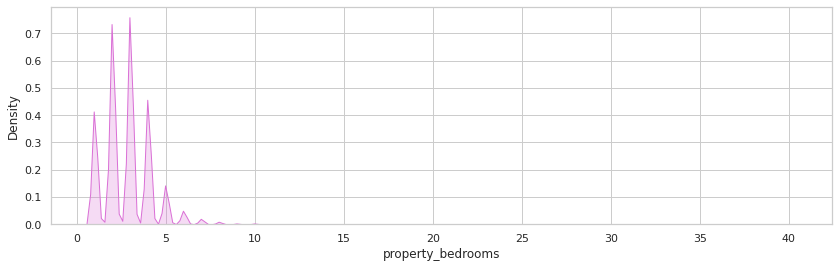

In [544]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_bedrooms'], shade=True, color="orchid")
plt.show()

fig = sns.kdeplot(df_filtrado['property_bedrooms'], shade=True, color="orchid")
plt.show()

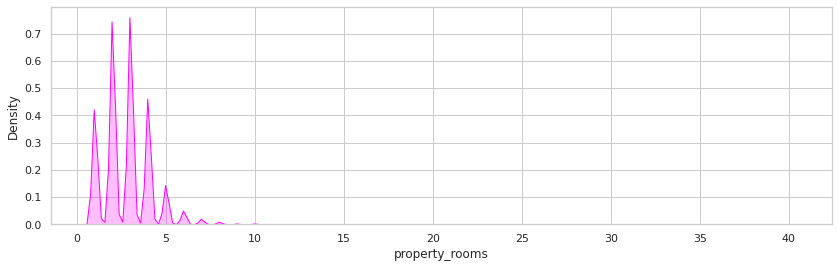

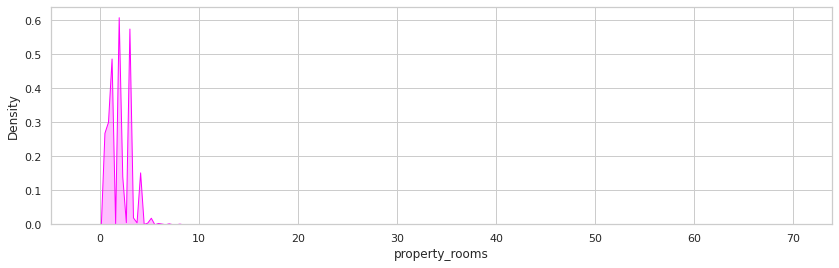

In [545]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_rooms'], shade=True, color="magenta")
plt.show()

fig = sns.kdeplot(df_filtrado['property_rooms'], shade=True, color="magenta")
plt.show()

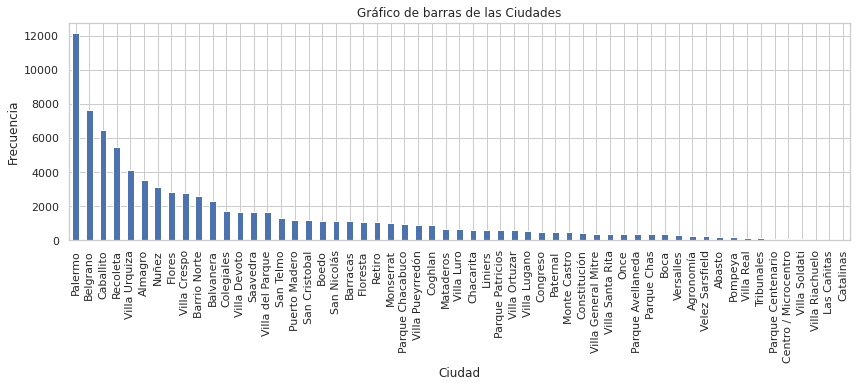

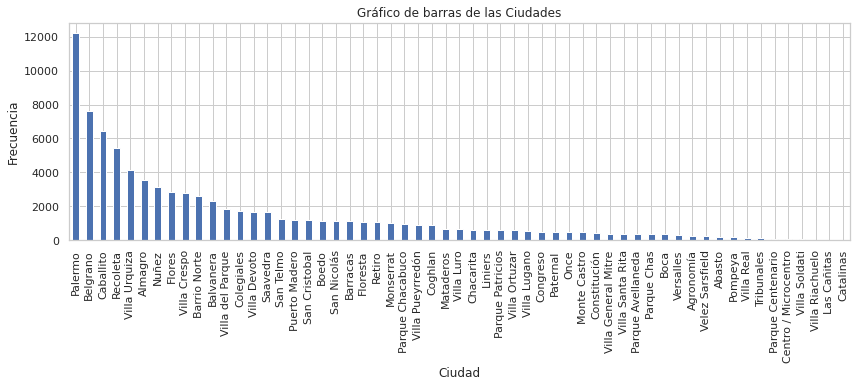

In [546]:
sns.set(style="whitegrid")

fig = df_previo_eliminar['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras de las Ciudades" , xlabel="Ciudad" , ylabel="Frecuencia") 
plt.show()

fig = df_filtrado['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras de las Ciudades" , xlabel="Ciudad" , ylabel="Frecuencia") 
plt.show()

## Ejercicio 1c: Valores atípicos : analizar la existencia de valores atípicos

### Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.

#### Análisis univariado

Inicialmente se graficarán los boxplots de las variables numéricas: propery_rooms, propery_beedrooms, property_surface_total, property_surface_covered y property_price

<AxesSubplot:ylabel='property_rooms'>

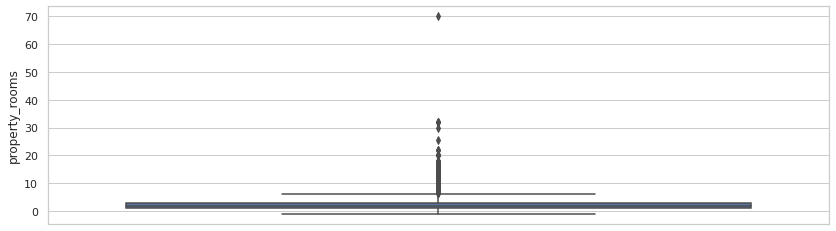

In [547]:
sns.boxplot(y=df_filtrado.property_rooms)

<AxesSubplot:ylabel='property_bedrooms'>

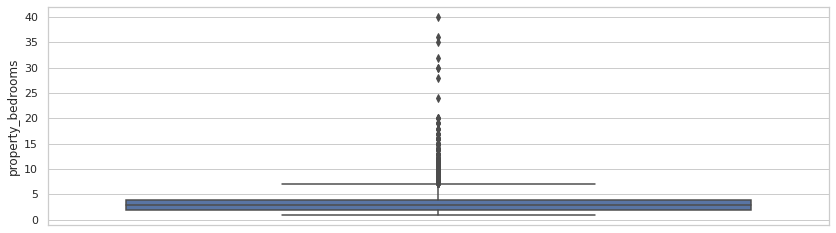

In [548]:
sns.boxplot(y=df_filtrado.property_bedrooms)

<AxesSubplot:ylabel='property_surface_total'>

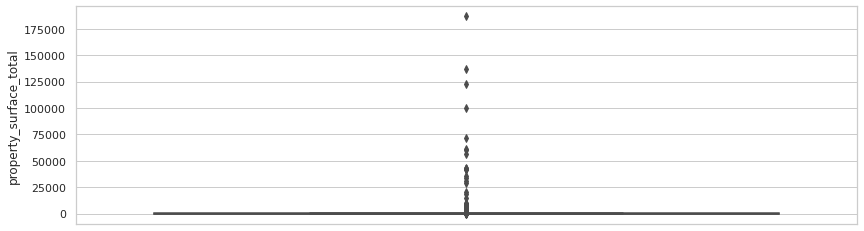

In [549]:
sns.boxplot(y=df_filtrado.property_surface_total)

<AxesSubplot:ylabel='property_surface_covered'>

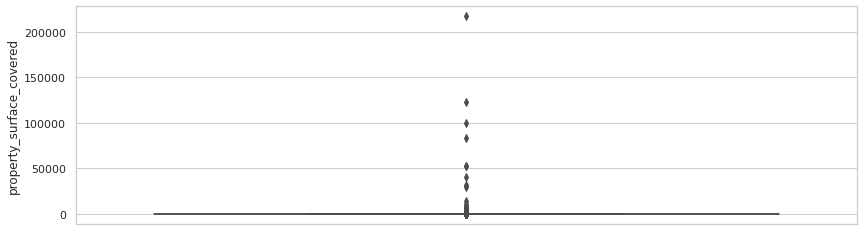

In [550]:
sns.boxplot(y=df_filtrado.property_surface_covered)

<AxesSubplot:ylabel='property_price'>

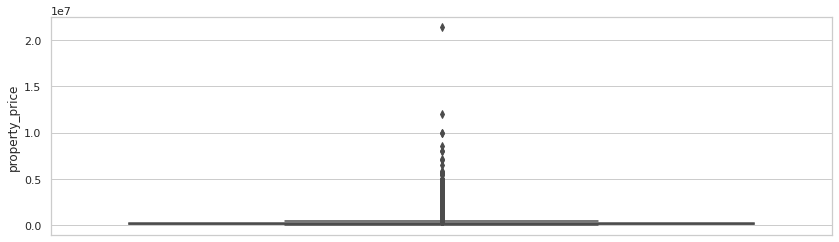

In [551]:
sns.boxplot(y=df_filtrado.property_price)
#(df[['property_price']] <= 0).any().to_frame('Precio menor a 0?')
#df[df['property_price'] <= 0].head()

<AxesSubplot:ylabel='latitud'>

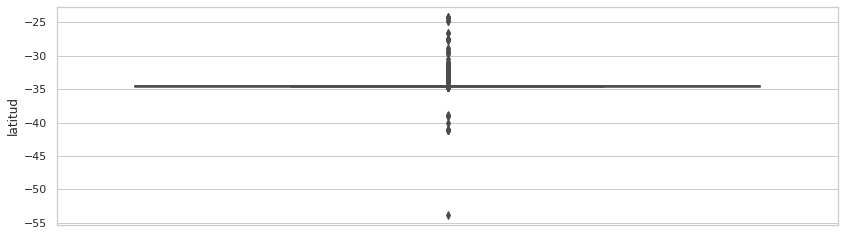

In [552]:
sns.boxplot(y=df_filtrado.latitud)

<AxesSubplot:xlabel='longitud'>

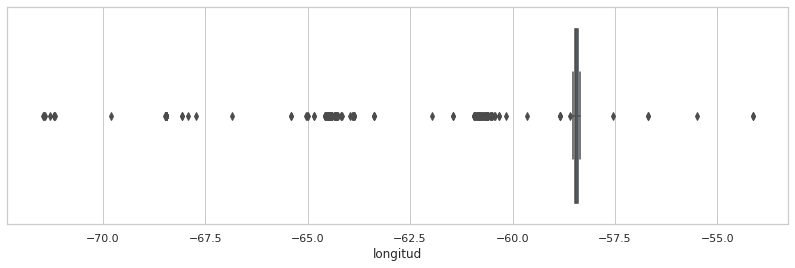

In [553]:
sns.boxplot(x=df_filtrado.longitud)

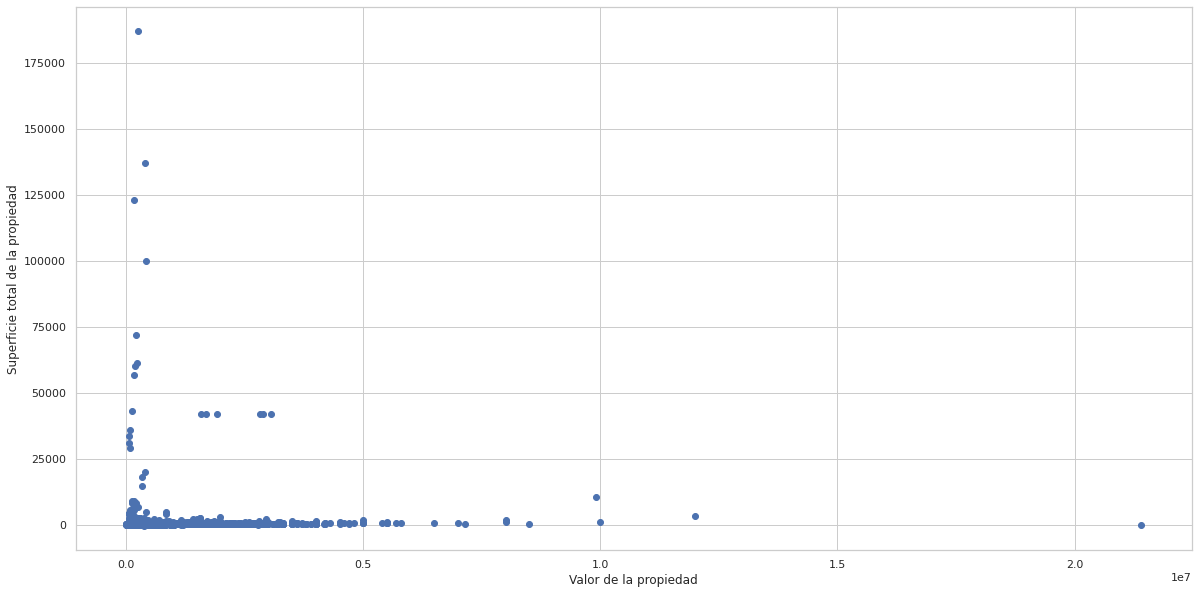

In [554]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(x=df_filtrado.property_price, y=df_filtrado.property_surface_total)

ax.set_xlabel('Valor de la propiedad')
ax.set_ylabel('Superficie total de la propiedad')
plt.show()

En base a los boxplots mostrados, se observan que las 5 variables numéricas, tienen candidatos a datos anómalas. A su vez, en el scatterplot se muestra el valor de la propiedad con la superficie, observando que en varios casos tiene datos que son anormales

Para un mejor análisis, se aplicarán las técnicas de Z-Score y Z-Score modificado:

In [555]:
zscore = pd.DataFrame()
zscore['z_rooms']=st.zscore(df_filtrado.property_rooms)
zscore['z_bedrooms']=st.zscore(df_filtrado.property_bedrooms)
zscore['z_surface_total'] = st.zscore(df_filtrado.property_surface_total)
zscore['z_surface_covered'] = st.zscore(df_filtrado.property_surface_covered)
zscore['z_price'] = st.zscore(df_filtrado.property_price)
zscore


,z_rooms,z_bedrooms,z_surface_total,z_surface_covered,z_price
0,0.972332,0.826515,0.052252,0.043950,-0.015837
1,0.119552,0.124548,-0.044211,-0.031260,-0.460177
2,0.972332,0.826515,-0.033967,-0.016796,-0.403891
3,0.119552,0.826515,0.021800,0.015988,-0.239580
4,0.119552,0.826515,-0.002881,-0.013904,0.124003
...,...,...,...,...,...
82929,0.972332,0.826515,0.017252,0.012131,0.019123
82930,0.119552,0.124548,-0.035675,-0.026439,-0.187140
82931,-0.733229,-1.279388,-0.050187,-0.055366,-0.486047
82932,-0.733229,-1.279388,-0.062138,-0.054402,-0.489543


##### Análisis coordenadas dentro de CABA

Las propiedades deben ubicarse entre las latitudes -34.53 y -34.69

In [556]:
df_filtrado[(df_filtrado.latitud > -34.53) | (df_filtrado.latitud < -34.69)]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
591,-31.678900,-63.879640,Villa del Parque,Casa,4.000000,5.000000,220.0,220.0,230000.0,VENTA HERMOSA CASA 5 AMB. C/PILETA - BOCA RATÓN
1302,-34.693942,-58.469429,Villa Lugano,Casa,2.000000,2.977251,355.0,120.0,220000.0,CASA TIPO CHALET EN VENTA VILLA LUGANO CON FON...
1304,-34.690775,-58.472361,Villa Lugano,Casa,3.000000,4.062698,300.0,140.0,270000.0,CASA EN VENTA EN VILLA LUGANO
1699,-34.694062,-58.466105,Villa Riachuelo,Casa,3.000000,4.000000,211.0,131.0,160000.0,casa en venta mataderos 4 amb villa riachuelo
1703,-33.081030,-68.468140,Villa del Parque,Departamento,2.000000,3.000000,66.0,60.0,80000.0,Venta 3 ambientes San Martín Centro Gran Balcon
...,...,...,...,...,...,...,...,...,...,...
80285,-33.081030,-68.468140,Villa del Parque,Departamento,0.520439,1.000000,38.0,38.0,89500.0,DEPTO A ESTR. COCHERA PISCINA PISTA DE ATLETISMO
81929,-34.691019,-58.475582,Villa Lugano,PH,3.000000,4.000000,265.0,135.0,210000.0,VENTA PH DE 4 AMBIENTES EN VILLA LUGANO
82152,-34.690154,-58.476133,Villa Riachuelo,Departamento,1.000000,2.000000,40.0,36.0,90000.0,Departamento de dos ambientes con cochera cubi...
82153,-34.691370,-58.472850,Villa Riachuelo,Departamento,4.000000,5.000000,168.0,100.0,130000.0,Dpto 5 amb 1° P patio terraza v riachuelo venta


Las propiedades deben ubicarse entre las longitudes -58.53 y -58.33

In [557]:
df_filtrado[(df_filtrado.longitud < -58.53 ) | (df_filtrado.longitud > -58.33)]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
591,-31.678900,-63.879640,Villa del Parque,Casa,4.000000,5.00000,220.000000,220.0,230000.0,VENTA HERMOSA CASA 5 AMB. C/PILETA - BOCA RATÓN
1703,-33.081030,-68.468140,Villa del Parque,Departamento,2.000000,3.00000,66.000000,60.0,80000.0,Venta 3 ambientes San Martín Centro Gran Balcon
1704,-31.390431,-64.179004,Villa del Parque,Departamento,0.490442,1.00000,580.090616,38.0,55000.0,Depto en VENTA 1 dormitorio + cochera - Merlo ...
2139,-41.163826,-71.438923,Villa del Parque,Casa,3.000000,4.11169,-259.878386,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...
2332,-33.528049,-64.168459,Villa del Parque,Casa,4.000000,5.00000,1800.000000,280.0,390000.0,Casa en venta Club de campo Las Perdices
...,...,...,...,...,...,...,...,...,...,...
75545,-30.436760,-64.317055,Villa del Parque,Casa,3.000000,6.00000,172.000000,112.0,134000.0,Venta Casa en Manzanares Barrio Abierto
77682,-31.678900,-63.879640,Villa del Parque,Casa,5.000000,8.00000,507.000000,457.0,650000.0,Venta casa en Los Lagartos CC
78372,-32.138586,-64.501116,Villa del Parque,Casa,2.000000,5.00000,700.000000,75.0,60000.0,Cabaña en venta en El Corcovado
80285,-33.081030,-68.468140,Villa del Parque,Departamento,0.520439,1.00000,38.000000,38.0,89500.0,DEPTO A ESTR. COCHERA PISCINA PISTA DE ATLETISMO


#### Análisis multivariado

##### LOF

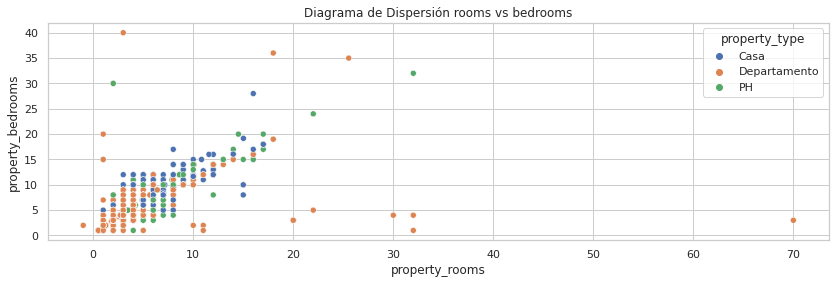

In [558]:
sns.scatterplot(x=df_filtrado['property_rooms'],y=df_filtrado['property_bedrooms'], hue = df_filtrado['property_type'])
plt.title('Diagrama de Dispersión rooms vs bedrooms')
plt.show()

Se pueden observar outliers de departamentos, algunas casas y un PH

In [559]:
#Conjunto de entrenamiento
X=df_filtrado[['property_rooms','property_bedrooms']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
x_pred = clf.fit_predict(X)

#Guardo los scores
df_scores = pd.DataFrame()
df_scores['scores']=clf.negative_outlier_factor_
df_scores.head(5)

,scores
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


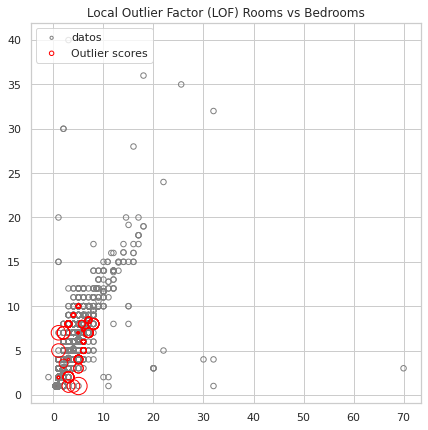

In [560]:
#Calculo radio para plotear score
radius = (df_scores.scores.max() - df_scores.scores) / (df_scores.scores.max() - df_scores.scores.min())

#Grafico LOF
plt.figure(figsize=(7,7))
plt.title("Local Outlier Factor (LOF) Rooms vs Bedrooms")
plt.scatter(df_filtrado.property_rooms.values,df_filtrado.property_bedrooms.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_filtrado.property_rooms.values,df_filtrado.property_bedrooms.values, s=300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

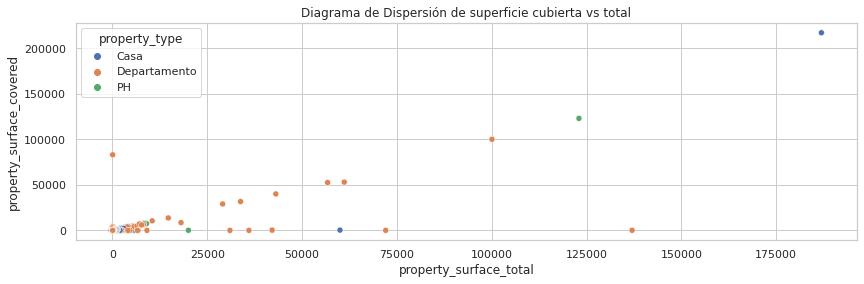

In [561]:
sns.scatterplot(x=df_filtrado['property_surface_total'],y=df_filtrado['property_surface_covered'], hue = df_filtrado['property_type'])
plt.title('Diagrama de Dispersión de superficie cubierta vs total')
plt.show()

Se puede observar variables alejadas al resto

In [562]:
#Conjunto de entrenamiento
Y= df_filtrado[['property_surface_covered', 'property_surface_total']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(Y)

#Guardo los scores
df_scores['scores2']=clf.negative_outlier_factor_
df_scores.head(3)

,scores,scores2
0,-1.0,-1.001679
1,-1.0,-1.000000
2,-1.0,-1.000000


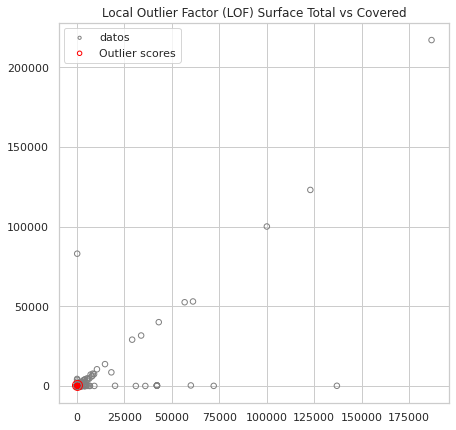

In [563]:
#Calculo radio para plotear score
radius = (df_scores.scores2.max() - df_scores.scores2) / (df_scores.scores2.max() - df_scores.scores2.min())

#Grafico LOF
plt.figure(figsize=(7,7))
plt.title("Local Outlier Factor (LOF) Surface Total vs Covered")
plt.scatter(df_filtrado.property_surface_total.values,df_filtrado.property_surface_covered.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_filtrado.property_surface_total.values,df_filtrado.property_surface_covered.values, s=100* radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()
#VER tema outliers lejanos que no se son rojos

##### Mahalanobis

Analisaremos la presencia de superficies erroneas mediante Mahalanobis.

In [564]:
def mahal_dists(X):
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)

    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

In [565]:
df_mahal = df_filtrado.copy()

df_mahal['mahalanobis']=mahal_dists(df_filtrado[['property_surface_covered','property_surface_total', 'property_price']])
df_mahal.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,mahalanobis
0,-34.589974,-58.459133,Palermo,Casa,3.0,4.0,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA,0.005438
1,-34.637319,-58.361124,Boca,Departamento,2.0,3.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,0.233909
2,-34.628647,-58.361871,Boca,Departamento,3.0,4.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,0.181758
3,-34.610027,-58.401934,Once,Departamento,2.0,4.0,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once,0.065713
4,-34.631621,-58.416825,Boedo,PH,2.0,4.0,106.415511,73.0,250000.0,PH - Boedo,0.017641


<AxesSubplot:ylabel='mahalanobis'>

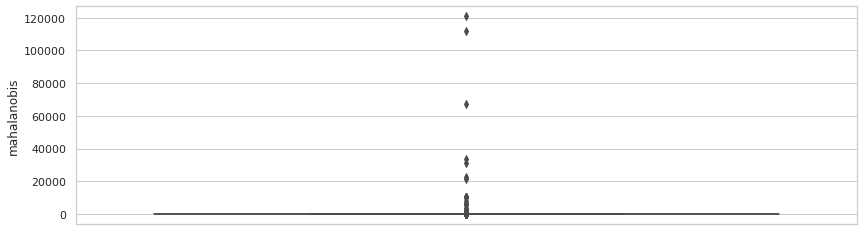

In [566]:
sns.boxplot(y=df_mahal.mahalanobis)

Ordeno las distancias de menor a mayor

In [567]:
np.sort(df_mahal.mahalanobis)

array([1.16627735e-05, 2.60306894e-05, 5.60926026e-05, ...,
       6.71245619e+04, 1.12007460e+05, 1.20949248e+05])

Definimos un umbral de 10000 y observamos anomalias

In [568]:
#Defino umbral
umbral=2500

#Observacione anómalas
df_mahal[df_mahal['mahalanobis']>umbral]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,mahalanobis
304,-34.637026,-58.426283,Parque Chacabuco,Casa,15.016421,19.163903,186906.808261,217000.0,250000.0,EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco,120949.248226
11980,-34.616044,-58.458621,Caballito,Departamento,1.995807,3.000000,68.000000,64.0,21400000.0,Departamento venta,5961.377951
14474,-34.578917,-58.429373,Palermo,Departamento,1.000000,2.000000,61130.000000,53030.0,225000.0,VENTA DEPARTAMENTO 2 AMBIENTES PALERMO C/AMENI...,6018.241184
16770,-34.588175,-58.396261,Recoleta,Departamento,0.609433,1.000000,36000.000000,30.0,90000.0,Departamento Monoambiente alquiler temporario ...,7733.448858
20918,-34.587320,-58.401556,Barrio Norte,Departamento,1.000000,2.000000,56740.000000,52540.0,175000.0,EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG...,5938.615691
23218,-34.550093,-58.483034,Saavedra,Departamento,1.000000,2.000000,43086.000000,40038.0,114000.0,"Venta Departamento 2 amb a Estrenar, Saavedra.",3451.037192
24985,-34.579163,-58.455725,Colegiales,Departamento,0.603120,1.000000,31000.000000,26.0,51100.0,Av. Alvarez Thomas 970 - Colegiales - Capital ...,5734.030134
25317,-34.599421,-58.386867,Barrio Norte,Departamento,3.000000,5.000000,137000.000000,135.0,390000.0,Alquiler Divino 5 Amb. - 137 M² en Barrio Norte,112007.460295
37950,-34.604362,-58.392366,Barrio Norte,Departamento,2.975578,4.000000,83.000000,83000.0,155000.0,AMPLIO DEPTO EN VENTA BARRIO NORTE,67124.561870
41173,-34.636532,-58.376406,Barracas,Departamento,3.000000,4.000000,72060.000000,90.0,210000.0,"VENTA SEMIPISO 4 AMBIENTES, EXCELENTE OPORTUIDAD",30964.956961


Detectamos 19 propiedades (la ultima listada esta erroneamente detectada) con disparidades entre superficie total y superficie cubierta.

Grafico scatter

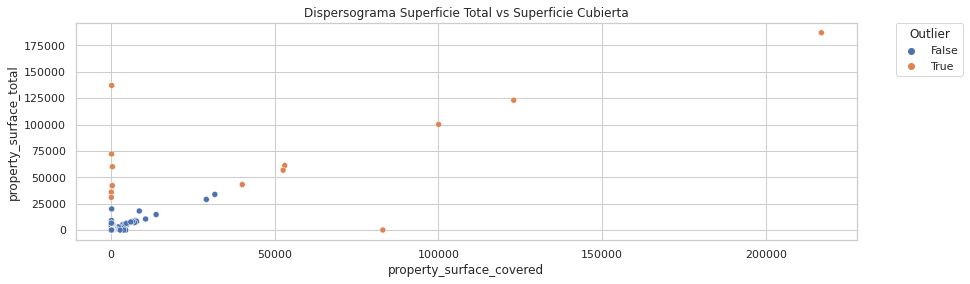

In [569]:
es_outlier = (df_mahal['mahalanobis'] > umbral)

sns.scatterplot(x=df_mahal.property_surface_covered,y=df_mahal.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Superficie Total vs Superficie Cubierta')
plt.show()

### Explicar que características poseen los datos atípicos detectados y decidir el tratamiento a aplicar sobre los mismos

#### Habitaciones y ambientes

In [570]:
df_filtrado[df_filtrado.property_rooms < 1] 

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
37,-34.563673,-58.480740,Coghlan,Departamento,0.521285,1.0,22.0,22.0,54000.0,Departamento - Coghlan
39,-34.557920,-58.478867,Coghlan,Departamento,0.521302,1.0,39.0,36.0,79900.0,Monoambiente con COCHERA y BALCÓN - Oportunidad
50,-34.580855,-58.426926,Palermo,Departamento,0.517138,1.0,35.0,35.0,80000.0,Divino Monoambiente en Palermo
56,-34.589197,-58.422700,Palermo,Departamento,0.517190,1.0,32.0,28.0,99000.0,MODERNO MONOAMBIENTE CON BALCÓN EN PALERMO
61,-34.584511,-58.426418,Palermo,Departamento,0.517172,1.0,34.0,34.0,89500.0,Venta Monoambiente a Estrenar en Palermo Holly...
...,...,...,...,...,...,...,...,...,...,...
82862,-34.586885,-58.451932,Chacarita,Departamento,0.522166,1.0,36.0,28.0,74562.0,1 AMB CON BALCON AL CONTRAFRENTE - EN CONSTRUC...
82888,-34.594158,-58.443106,Villa Crespo,Departamento,0.511450,1.0,38.0,33.0,105000.0,Excelente Dpto. con balcón a estrenar- Villa C...
82900,-34.620094,-58.388173,Constitución,Departamento,0.520747,1.0,41.0,36.0,82000.0,RETASADO!!! - U$S 82.000 - 1 amb Divisible - C...
82922,-34.571806,-58.479139,Villa Urquiza,Departamento,0.507709,1.0,38.0,32.0,85000.0,Departamento monoambiente a estrenar con ampli...


Property rooms tiene valores < a 1

In [571]:
df_filtrado[(df_filtrado.property_rooms < 1) & (df_filtrado.property_bedrooms == 1)]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
37,-34.563673,-58.480740,Coghlan,Departamento,0.521285,1.0,22.0,22.0,54000.0,Departamento - Coghlan
39,-34.557920,-58.478867,Coghlan,Departamento,0.521302,1.0,39.0,36.0,79900.0,Monoambiente con COCHERA y BALCÓN - Oportunidad
50,-34.580855,-58.426926,Palermo,Departamento,0.517138,1.0,35.0,35.0,80000.0,Divino Monoambiente en Palermo
56,-34.589197,-58.422700,Palermo,Departamento,0.517190,1.0,32.0,28.0,99000.0,MODERNO MONOAMBIENTE CON BALCÓN EN PALERMO
61,-34.584511,-58.426418,Palermo,Departamento,0.517172,1.0,34.0,34.0,89500.0,Venta Monoambiente a Estrenar en Palermo Holly...
...,...,...,...,...,...,...,...,...,...,...
82862,-34.586885,-58.451932,Chacarita,Departamento,0.522166,1.0,36.0,28.0,74562.0,1 AMB CON BALCON AL CONTRAFRENTE - EN CONSTRUC...
82888,-34.594158,-58.443106,Villa Crespo,Departamento,0.511450,1.0,38.0,33.0,105000.0,Excelente Dpto. con balcón a estrenar- Villa C...
82900,-34.620094,-58.388173,Constitución,Departamento,0.520747,1.0,41.0,36.0,82000.0,RETASADO!!! - U$S 82.000 - 1 amb Divisible - C...
82922,-34.571806,-58.479139,Villa Urquiza,Departamento,0.507709,1.0,38.0,32.0,85000.0,Departamento monoambiente a estrenar con ampli...


Property rooms tiene valores < a 1 y property bedrooms = 1, suponemos que es un monoambiente

In [572]:
df_filtrado[['property_bedrooms', 'property_rooms']] = df_filtrado[['property_bedrooms', 'property_rooms']].apply(np.ceil).astype('int64')
df_filtrado[df_filtrado.property_rooms < 1]  

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
73340,-34.577595,-58.495185,Villa Urquiza,Departamento,-1,2,61.0,43.0,125000.0,Jardines de Roosevelt - Hermoso 3 ambientes co...


In [573]:
df_filtrado[df_filtrado.property_bedrooms < 1]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


No pueden existir inmobiliarios sin habitaciones

In [574]:
indices_negativos = df_filtrado[df_filtrado.property_rooms < 1].index
df_filtrado.loc[indices_negativos, ['property_rooms']] = df_filtrado.loc[indices_negativos, ['property_rooms']].values*-1

No pueden existir ambientes negativos

In [575]:
df_filtrado[df_filtrado.property_bedrooms > df_filtrado.property_rooms] 

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589974,-58.459133,Palermo,Casa,3,4,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,Departamento,2,3,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,Departamento,3,4,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,Departamento,2,4,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,PH,2,4,106.415511,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...
82926,-34.632484,-58.432932,Parque Chacabuco,Departamento,2,3,97.554031,76.0,129000.0,DEPARTAMENTO VENTA PARQUE CHACABUCO 3 AMBIENTES
82927,-34.636285,-58.400321,Parque Patricios,Departamento,2,3,66.000000,64.0,130000.0,Atractivo depto en el edificio histórico del P...
82929,-34.603245,-58.489810,Villa del Parque,Departamento,3,4,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82930,-34.614063,-58.482814,Villa del Parque,Departamento,2,3,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!


No pueden existir mas habitaciones que ambientes, el tratamiento decidido para estos caso es invertir dichos valores.

In [576]:
indexs = df_filtrado[df_filtrado.property_bedrooms > df_filtrado.property_rooms].index
df_filtrado.loc[indexs, ['property_rooms', 'property_bedrooms']] = df_filtrado.loc[indexs,['property_bedrooms', 'property_rooms']].values
df_filtrado.loc[indexs,:]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...
82926,-34.632484,-58.432932,Parque Chacabuco,Departamento,3,2,97.554031,76.0,129000.0,DEPARTAMENTO VENTA PARQUE CHACABUCO 3 AMBIENTES
82927,-34.636285,-58.400321,Parque Patricios,Departamento,3,2,66.000000,64.0,130000.0,Atractivo depto en el edificio histórico del P...
82929,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82930,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!


#### Superficies

In [577]:
df_filtrado[df_filtrado.property_surface_total <= 0]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
2139,-41.163826,-71.438923,Villa del Parque,Casa,5,3,-259.878386,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...
30066,-41.164123,-71.415420,Villa del Parque,Casa,3,2,-305.296995,70.0,380000.0,"HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C..."


La superficie total no puede ser <= 0

A pesar de ser negativos los valores, si fueran positivos tendrían sentido comparando con las descripciones de la publicación. Es por esto, que se decidirá multiplicar por -1 para hacerlos positivos.

In [578]:
indexs = df_filtrado[df_filtrado.property_surface_total <= 0].index
df_filtrado.loc[indexs, ['property_surface_total']] = df_filtrado.loc[indexs,['property_surface_total']].values*-1
df_filtrado[df_filtrado.property_surface_total <= 0] #

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [579]:
df_filtrado[df_filtrado.property_surface_covered<= 0] #La superficie cubierta no puede ser <= 0

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
92,-34.557302,-58.468573,Belgrano,Departamento,1,1,25.0,-1.234306,100000.0,Loft monoambiente de diseño y balcon a estrenar!!
2146,-34.601931,-58.411260,Abasto,Departamento,1,1,18.0,-1.686061,38000.0,Departamento - Abasto
34340,-34.543864,-58.461433,Nuñez,Departamento,2,1,34.0,-2.045317,80735.0,Departamento - Nuñez


La superficie cubierta no puede ser <= 0

Comparando estos casos, con las descripciones provistas, no son valores que tengan sentido, aún volviéndose positivos. Por lo que decidimos eliminarlos

In [580]:
df_filtrado.drop(df_filtrado[df_filtrado.property_surface_covered <= 0].index, inplace = True)
df_filtrado[df_filtrado.property_surface_covered <= 0]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


La superficie total no puede ser menor que la cubierta

In [581]:
df_filtrado[df_filtrado.property_surface_covered > df_filtrado.property_surface_total]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
159,-34.621380,-58.368535,San Telmo,Departamento,1,1,31.287410,37.000000,82000.0,Departamento - San Telmo
304,-34.637026,-58.426283,Parque Chacabuco,Casa,20,16,186906.808261,217000.000000,250000.0,EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco
446,-34.606716,-58.394318,Balvanera,Departamento,1,1,23.228849,25.000000,49000.0,Ideal para primera vivienda o estudiante - Dep...
508,-34.606366,-58.383480,San Nicolás,Departamento,8,6,178.000000,191.065355,200000.0,"venta DEPARTAMENTO APTO PROFESIONAL, 6 habitac..."
751,-34.618470,-58.375816,San Telmo,Departamento,3,2,61.000000,61.064440,135000.0,Departamento - Capital Federal
...,...,...,...,...,...,...,...,...,...,...
79854,-34.609270,-58.411639,Almagro,Departamento,1,1,17.399398,18.000000,72000.0,Departamento - Almagro
79988,-34.618846,-58.518912,Villa Devoto,Departamento,1,1,45.393205,48.000000,65000.0,Departamento en Devoto (Av. Lope de Vega 2400)
80230,-34.633372,-58.459943,Flores,Departamento,4,3,77.000000,81.874564,135000.0,Departamento - Flores
80894,-34.603007,-58.405692,Belgrano,Departamento,1,1,33.469775,36.000000,130000.0,Departamento - Belgrano


Además de esto, observamos que si los valores estuvieran intercambiados entre superficie cubierta y total, serían publicaciones con sentido, es por esto que se intercambiarán dichos valores

In [582]:
indexs = df_filtrado[df_filtrado.property_surface_covered > df_filtrado.property_surface_total].index
df_filtrado.loc[indexs, ['property_surface_total', 'property_surface_covered']] = df_filtrado.loc[indexs,['property_surface_covered', 'property_surface_total']].values
df_filtrado.loc[indexs,:]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
159,-34.621380,-58.368535,San Telmo,Departamento,1,1,37.000000,31.287410,82000.0,Departamento - San Telmo
304,-34.637026,-58.426283,Parque Chacabuco,Casa,20,16,217000.000000,186906.808261,250000.0,EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco
446,-34.606716,-58.394318,Balvanera,Departamento,1,1,25.000000,23.228849,49000.0,Ideal para primera vivienda o estudiante - Dep...
508,-34.606366,-58.383480,San Nicolás,Departamento,8,6,191.065355,178.000000,200000.0,"venta DEPARTAMENTO APTO PROFESIONAL, 6 habitac..."
751,-34.618470,-58.375816,San Telmo,Departamento,3,2,61.064440,61.000000,135000.0,Departamento - Capital Federal
...,...,...,...,...,...,...,...,...,...,...
79854,-34.609270,-58.411639,Almagro,Departamento,1,1,18.000000,17.399398,72000.0,Departamento - Almagro
79988,-34.618846,-58.518912,Villa Devoto,Departamento,1,1,48.000000,45.393205,65000.0,Departamento en Devoto (Av. Lope de Vega 2400)
80230,-34.633372,-58.459943,Flores,Departamento,4,3,81.874564,77.000000,135000.0,Departamento - Flores
80894,-34.603007,-58.405692,Belgrano,Departamento,1,1,36.000000,33.469775,130000.0,Departamento - Belgrano


##### Superficies absurdas

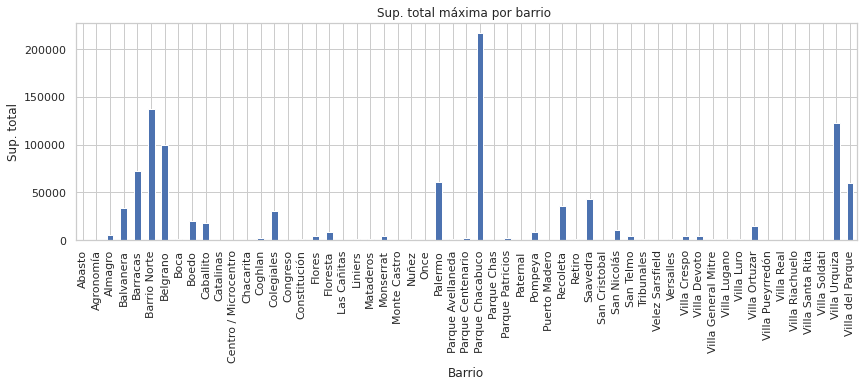

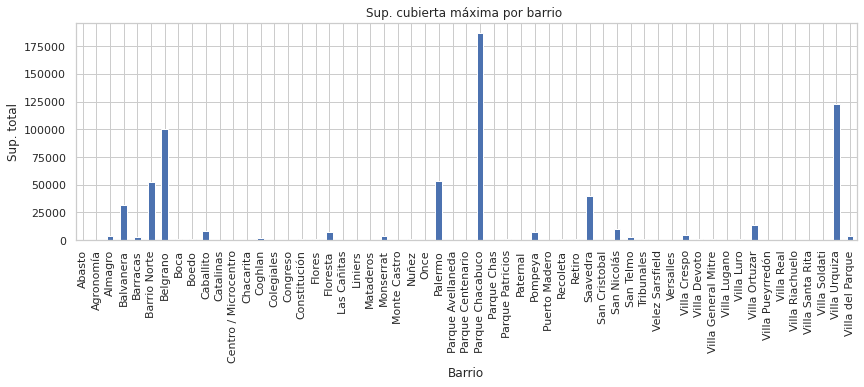

In [583]:
plt.rcParams['figure.figsize'] = (14,4)
df_filtrado.groupby(by=['place_l3'])['property_surface_total'].max().plot.bar(alpha=1 , title="Sup. total máxima por barrio " , xlabel="Barrio" , ylabel="Sup. total")
plt.show()

df_filtrado.groupby(by=['place_l3'])['property_surface_covered'].max().plot.bar(alpha=1 , title="Sup. cubierta máxima por barrio " , xlabel="Barrio" , ylabel="Sup. total")
plt.show()

Notamos una diferencia enorme entre superficies maximas, ya sean cubiertas o totales, procedemos a normalizar las superficies por barrios (tanto las cubiertas como las totales).

Veamos las superficies promedio de cada barrio

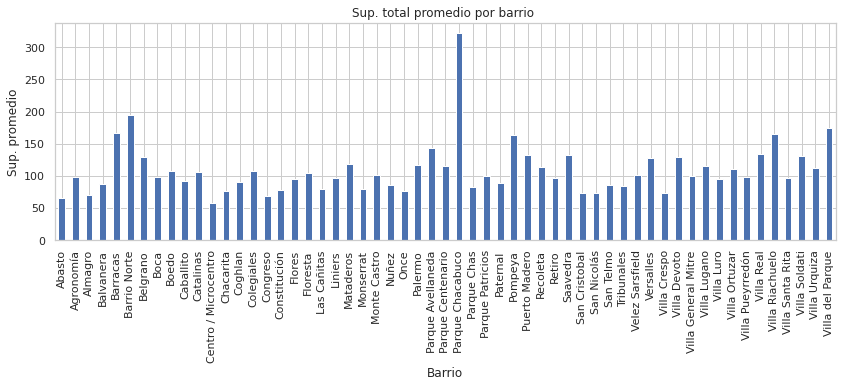

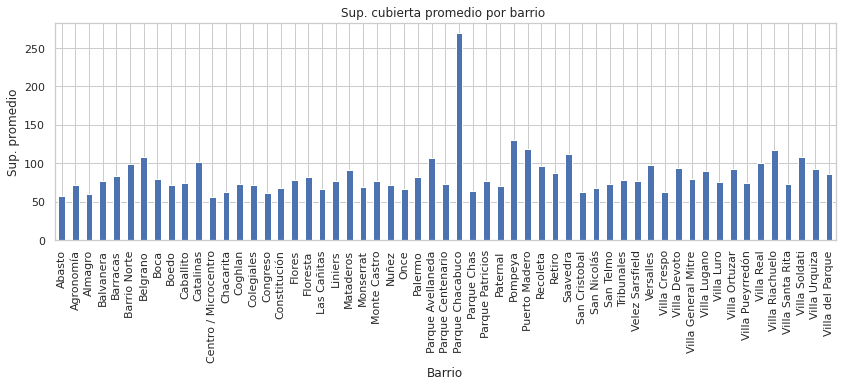

In [584]:
plt.rcParams['figure.figsize'] = (14,4)
sup_total_promedios_por_barrio = df_filtrado.groupby(by=['place_l3'])['property_surface_total'].mean()
sup_total_promedios_por_barrio.plot.bar(alpha=1 , title="Sup. total promedio por barrio " , xlabel="Barrio" , ylabel="Sup. promedio")
plt.show()

sup_cubierta_promedios_por_barrio = df_filtrado.groupby(by=['place_l3'])['property_surface_covered'].mean()
sup_cubierta_promedios_por_barrio.plot.bar(alpha=1 , title="Sup. cubierta promedio por barrio " , xlabel="Barrio" , ylabel="Sup. promedio")
plt.show()


Los promedios no se ven tan fuera de lo normal a excepción de Parque Chacabuco, pero dada la operación realizada sus valores se van a normalizar un poco.

Normalización superficie total por barrio

In [585]:
max_sup_total_promedio = df_filtrado.groupby(by=['place_l3'])['property_surface_total'].mean().max()
sup_total_promedios_por_barrio_dict = sup_total_promedios_por_barrio.to_dict()
sup_total_promedios_por_barrio_dict

def corregir_sup_total(sup_total, place):
    return sup_total if sup_total <= (10 * sup_total_promedios_por_barrio_dict[place]) else sup_total_promedios_por_barrio_dict[place]

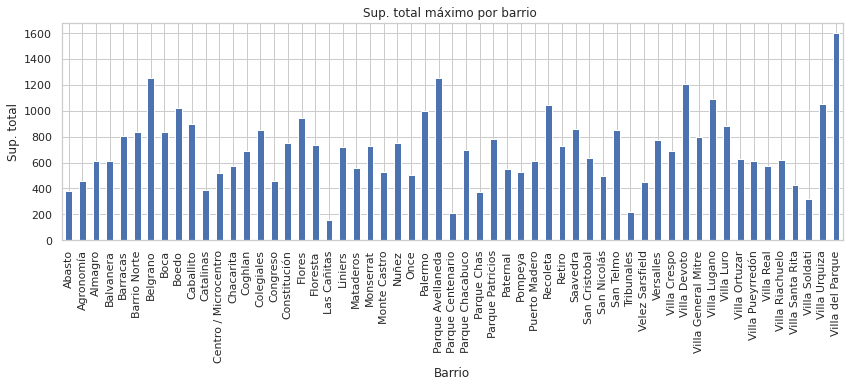

In [586]:
df_filtrado['property_surface_total'] = df_filtrado.apply(lambda row: corregir_sup_total(row['property_surface_total'], row['place_l3']), axis=1)

#Verificamos que los máximos de cada barrio estén más normalizados
plt.rcParams['figure.figsize'] = (14,4)
df_filtrado.groupby(by=['place_l3'])['property_surface_total'].max().plot.bar(alpha=1 , title="Sup. total máximo por barrio " , xlabel="Barrio" , ylabel="Sup. total")
plt.show()

Normalización superficie cubierta por barrio 

In [587]:
max_sup_cubierta_promedio = df_filtrado.groupby(by=['place_l3'])['property_surface_covered'].mean().max()
sup_cubierta_promedios_por_barrio_dict = sup_cubierta_promedios_por_barrio.to_dict()
sup_cubierta_promedios_por_barrio_dict

def corregir_sup_cubierta(sup_cubierta, place):
    return sup_cubierta if sup_cubierta <= (10 * sup_cubierta_promedios_por_barrio_dict[place]) else sup_cubierta_promedios_por_barrio_dict[place]

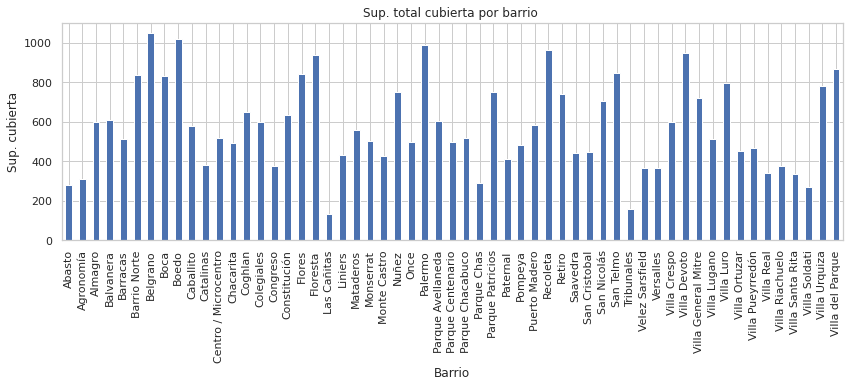

In [588]:
df_filtrado['property_surface_covered'] = df_filtrado.apply(lambda row: corregir_sup_total(row['property_surface_covered'], row['place_l3']), axis=1)

#Verificamos que los máximos de cada barrio estén más normalizados
plt.rcParams['figure.figsize'] = (14,4)
df_filtrado.groupby(by=['place_l3'])['property_surface_covered'].max().plot.bar(alpha=1 , title="Sup. total cubierta por barrio " , xlabel="Barrio" , ylabel="Sup. cubierta")
plt.show()

#### Precios de las propiedades

In [589]:
df_filtrado[(df_filtrado.property_rooms > 10) & (df_filtrado.property_type == 'Departamento')]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
1873,-34.563353,-58.444035,Belgrano,Departamento,12,5,435.000000,435.000000,850000.0,"Oportunidad retasada!!! Virrey Loreto 1700, 19..."
4162,-34.616391,-58.456038,Caballito,Departamento,30,2,79.000000,79.000000,230000.0,C/DEP COCH Y BAULERA - SEGUI AL 700 - Caballito
5804,-34.612770,-58.377602,Monserrat,Departamento,11,8,300.000000,300.000000,800000.0,Departamento - Monserrat
7197,-34.576061,-58.421289,Palermo,Departamento,20,3,127.000000,117.000000,650000.0,Departamento - Palermo
8109,-34.614573,-58.480650,Villa del Parque,Departamento,11,2,35.000000,14.000000,95000.0,Departamento 2 ambientes al frente con Balcón ...
8743,-34.609106,-58.377677,Monserrat,Departamento,13,9,300.000000,300.000000,800000.0,Departamento Apto profesional- Monserrat
9088,-34.594375,-58.380131,Retiro,Departamento,11,8,676.000000,493.000000,1100000.0,Excelente duplex en edificio francés de gran c...
9500,-34.608645,-58.485619,Villa del Parque,Departamento,32,4,83.000000,75.000000,189000.0,Departamento 4 ambientes a estrenar en duplex ...
9816,-34.630186,-58.389156,Parque Patricios,Departamento,32,1,32.000000,32.000000,52000.0,Depto 1 ambiente amplio apto profesional
10298,-34.594430,-58.396078,Recoleta,Departamento,14,12,660.000000,600.000000,1400000.0,Ayacucho * 1200 . Piso. APTO COMERCIAL. Sup...


Se puede ver que generalmente la cantidad de ambientes descritos en property_title no es el mismo que en property_rooms

In [590]:
df_filtrado[(df_filtrado.property_surface_covered > 10000) & (df_filtrado.property_type == 'Casa')]


,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [591]:
df_ambientes = df_filtrado.query('property_title.str.contains("AMB") or '
                                'property_title.str.contains("amb") or '
                                'property_title.str.contains("Amb")', engine='python')
df_monos = df_ambientes.query('property_title.str.contains("MONO") or property_title.str.contains("mono") or '
                                'property_title.str.contains("Mono")' )
df_monos

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
25,-34.557302,-58.468573,Nuñez,Departamento,1,1,44.0,38.0,104000.0,Loft monoambiente de diseño gran balcon estrenar!
26,-34.557302,-58.468573,Nuñez,Departamento,1,1,71.0,46.0,119000.0,Loft monoambiente de diseño con jardin a estre...
39,-34.557920,-58.478867,Coghlan,Departamento,1,1,39.0,36.0,79900.0,Monoambiente con COCHERA y BALCÓN - Oportunidad
50,-34.580855,-58.426926,Palermo,Departamento,1,1,35.0,35.0,80000.0,Divino Monoambiente en Palermo
56,-34.589197,-58.422700,Palermo,Departamento,1,1,32.0,28.0,99000.0,MODERNO MONOAMBIENTE CON BALCÓN EN PALERMO
...,...,...,...,...,...,...,...,...,...,...
82904,-34.622092,-58.365249,Puerto Madero,Departamento,1,1,50.0,50.0,175000.0,MONOAMBIENTE C/COCHERA PUERTO MADERO
82918,-34.588307,-58.483894,Villa Urquiza,Departamento,1,1,33.0,30.0,85000.0,Monoambiente Villa Urquiza con balcon a estrenar
82922,-34.571806,-58.479139,Villa Urquiza,Departamento,1,1,38.0,32.0,85000.0,Departamento monoambiente a estrenar con ampli...
82931,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.0,30.0,75500.0,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...


In [592]:
indexs = df_monos[(df_monos.property_rooms > 1 ) & (df_monos.property_type == 'Departamento')].index
df_ambientes.loc[indexs,['property_rooms', 'property_bedrooms']] = 1
df_ambientes.loc[29430]

latitud                                                            -34.642037
longitud                                                           -58.438995
place_l3                                                     Parque Chacabuco
property_type                                                    Departamento
property_rooms                                                              1
property_bedrooms                                                           1
property_surface_total                                                   37.0
property_surface_covered                                                 33.0
property_price                                                        67000.0
property_title              Venta Departamento monoambiente balcón full am...
Name: 29430, dtype: object

Todos los departamentos que su property_titles contenga la palabra "Monoambiente" se le cambiarán los rooms y los ambientes

In [593]:
df_sin_mono= df_ambientes.filter(regex= '^(?!Mono$).*')
columns = df_sin_mono.property_title.str.split(" ")

In [594]:
dicNumStrToInt = {
    "un" : 1,
    "uno" : 1,
    "dos" : 2,
    "tres" : 3,
    "cuatro" : 4,
    "cinco" : 5,
    "seis" : 6,
    "siete" : 7,
    "ocho" : 8,
    "nueve" : 9
}

def strNumeroToInt(numero): # TODO
    if numero.isdigit():
        num = int(round(float(numero), 0))
        if num > 20:
            return -111 # esto cubre tres casos atipicos, ejemplo "Monroe 4689 5amb" 
        return num
    
    elif numero.lower() in dicNumStrToInt:
        return dicNumStrToInt[numero.lower()]

    return numero

def esPalabraAmbiente(palabra):
    palabraNormalized = palabra.lower()
    if ("amb" in palabraNormalized) and ("mono" not in palabraNormalized):
        return True
    return False
    
def obtenerPosPalabraAmbiente(palabras):
    i = 0
    for palabra in palabras:
        if esPalabraAmbiente(palabra):
            return i
        i = i+1
    return -111 # si llego hasta aca algo anda mal
        
def obtenerCantidadDeAmbientes(palabras):
    posPalabraAmbiente = obtenerPosPalabraAmbiente(palabras)
    
    if posPalabraAmbiente == 0 or posPalabraAmbiente == -111:
        return -111
    
    return strNumeroToInt(palabras[posPalabraAmbiente -1])

print(obtenerCantidadDeAmbientes(columns.loc[73340]))


3


In [595]:
# Obtener cantidad de ambientes y modificarla en el dataset
for i in range (df_ambientes.shape[0]):
    ambientes = obtenerCantidadDeAmbientes(columns.iloc[i])
    if(isinstance(ambientes, int) and ambientes != -111):
        #print(ambientes)
        if(ambientes < 0):
            ambientes = ambientes*-1
        if(ambientes != df_ambientes.iloc[i].property_rooms):
            indice = df_ambientes.index.values[i]
            df_ambientes.loc[indice, "property_rooms"] = ambientes

In [596]:
indices_cambios = df_ambientes.index
df_filtrado.loc[indices_cambios,['property_rooms', 'property_bedrooms']] = df_ambientes.loc[indices_cambios, ['property_rooms', 'property_bedrooms']].values
df_filtrado

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...
82929,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82930,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!
82931,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
82932,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


Todavia hay outliers generalmente en departamentos, como no hay info suficiente como para poder resolverlos serán quitados del dataset

Entonces, serán quitados los departamentos cuyos amb >10 y cant habitaciones < 40% de los ambientes

In [597]:
indices_a_eliminar = df_filtrado[(df_filtrado.property_rooms > 10) & (df_filtrado.property_rooms.values*0.40> df_filtrado.property_bedrooms)].index
df_filtrado.drop(indices_a_eliminar, inplace = True )

In [598]:
df_filtrado

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...
82929,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82930,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!
82931,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
82932,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


#### Precios de las propiedades

El precio de una propiedad no puede ser <= 0

In [599]:
df_filtrado[df_filtrado.property_price <= 0] 

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


#### Coordenadas de la propiedad

Elimino las propiedades que no tengan coordenadas dentro de CABA

In [600]:
df_filtrado = df_filtrado[(df_filtrado.latitud < -34.53) & (df_filtrado.latitud > -34.69)]
df_filtrado = df_filtrado[(df_filtrado.longitud > -58.53 ) & (df_filtrado.longitud < -58.33)]
df_filtrado

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...
82929,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82930,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!
82931,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.000000,30.0,75500.0,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
82932,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.000000,31.0,74500.0,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


#### Resumen cambios aplicados

Fueron aplicados en el punto anterior los siguientes cambios:

- Property rooms tiene valores < a 1 y property bedrooms = 1, suponemos que es un monoambiente, se redondendea la cantidad de ambientes a 1.

- Los ambientes negativos fueron multiplicados por -1.

- No pueden existir mas habitaciones que ambientes, por lo que se le hace un swap entre estos ya que se detecto que en titulo del departamento generalmente estaba lo descrito de ambientes dentro de la seccion dormitorios.

- La superficie total no puede ser <= 0, se detecto que si el valor fuera positivo tendrían sentido comparando con las descripciones de la publicación, por lo que se los multiplica por -1 para resolver este error.

- La superficie cubierta <= 0. Comparando estos casos, con las descripciones provistas, no son valores que tengan sentido, aún volviéndose positivos. Por lo que decidimos eliminarlos.

- La superficie total no puede ser menor que la cubierta. Similar como el caso de los dormitorios y los ambientes, se les hizo un swap para que quede bien.

- Se normalizaron las superficies con valores absurdos, tanto las totales como las cubiertas.

- Se reemplazó la cantidad de ambientes y habitaciones según lo descrito en el titulo de la propiedad

- Por último se decidió que si un inmobiliario tenía exagerados números de ambientes pero pocas habitaciones se eliminaría por falta de datos.

In [601]:
#Una vez analizado property_title y habiendo corregido los datos, podemos prescindir de dicha columna
df_filtrado.drop(['property_title'], axis=1, inplace=True)
df_filtrado.to_csv("./data/properati_argentina_2021_filtrado.csv", index=False)

### Analizar la relación entre el precio de venta y los metros de superficie 
¿hay valores atípicos que no se detectaron previamente?

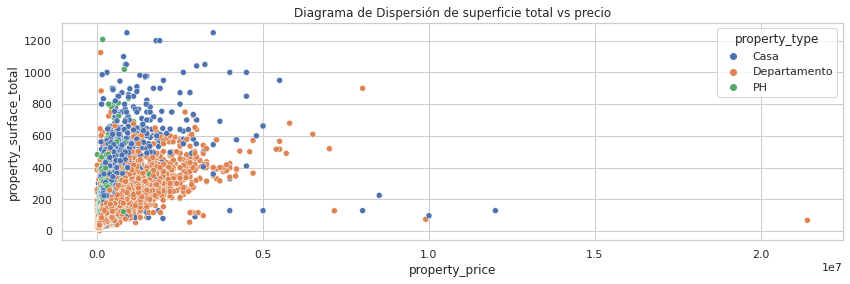

In [602]:
sns.scatterplot(x=df_filtrado['property_price'],y=df_filtrado['property_surface_total'], hue = df_filtrado['property_type'])
plt.title('Diagrama de Dispersión de superficie total vs precio')
plt.show()

In [603]:
#VER NUMERO DE NEIGHBORS
#Conjunto de entrenamiento
Z= df_filtrado[['property_price', 'property_surface_total']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=10)

#Genero prediccion
z_pred = clf.fit_predict(Z)
len(clf.negative_outlier_factor_) == len(Z)

#Guardo los scores
df_scores = pd.DataFrame()
df_scores['scores3']=clf.negative_outlier_factor_

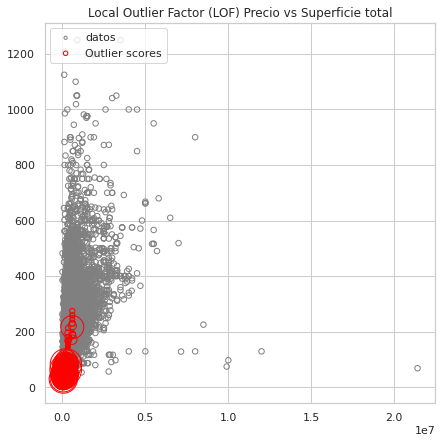

In [604]:
#Calculo radio para plotear score
radius = (df_scores.scores3.max() - df_scores.scores3) / (df_scores.scores3.max() - df_scores.scores3.min())

#Grafico LOF
plt.figure(figsize=(7,7))
plt.title("Local Outlier Factor (LOF) Precio vs Superficie total")
plt.scatter(df_filtrado.property_price.values,df_filtrado.property_surface_total.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_filtrado.property_price.values,df_filtrado.property_surface_total.values, s=1000* radius, edgecolors='red',facecolors='none', label='Outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

Efectivamente hay outliers que no fueron detectados anteriormente por lo que se tratarán a continuación

In [605]:
df_filtrado[(df_filtrado.property_surface_total < 100) & (df_filtrado.property_price > 1000000)]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
197,-34.605781,-58.376705,San Nicolás,Departamento,4,3,74.091677,74.091677,9900000.0
1179,-34.573416,-58.447945,Colegiales,Departamento,2,1,53.000000,40.000000,1160600.0
10151,-34.608698,-58.391820,Balvanera,Departamento,10,5,86.704147,86.704147,1500000.0
11980,-34.616044,-58.458621,Caballito,Departamento,3,2,68.000000,64.000000,21400000.0
25628,-34.556336,-58.465962,Nuñez,Casa,10,6,86.484122,566.000000,1200000.0
26203,-34.610576,-58.361591,Puerto Madero,Departamento,2,1,90.000000,85.000000,1200000.0
31729,-34.557754,-58.471497,Coghlan,Casa,4,3,90.287735,90.287735,2950000.0
33874,-34.626697,-58.373873,San Telmo,Casa,17,14,85.966486,85.966486,1550000.0
36864,-34.595345,-58.374737,Retiro,Departamento,7,6,96.847453,740.000000,3200000.0
49169,-34.613827,-58.373096,San Telmo,Casa,3,2,85.966486,85.966486,1150000.0


In [606]:
indice = df_filtrado[(df_filtrado.property_surface_total < 100) & (df_filtrado.property_price > 1000000)].index
df_filtrado.drop(indice, inplace=True)


Son eliminados debido a que poseen rasgos atipicos y no hay información para tratarlos

In [607]:
indice = df_filtrado[(df_filtrado.property_surface_total >50000) & (df_filtrado.property_price < 1000000)].index
df_filtrado.drop(indice, inplace=True) 

In [608]:
indice = df_filtrado[df_filtrado.property_surface_total < 10].index
df_filtrado.drop(indice, inplace=True)

In [609]:
indice = df_filtrado[df_filtrado.property_surface_covered < 2].index
df_filtrado.loc[indice, 'property_surface_covered'] = df_filtrado.loc[indice, 'property_surface_covered'].values*10
df_filtrado[df_filtrado.property_surface_covered > df_filtrado.property_surface_total]

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
6899,-34.628565,-58.445791,Caballito,Departamento,4,3,92.492414,162.000000,449900.0
7918,-34.662911,-58.514027,Mataderos,Casa,8,6,118.697443,250.000000,295000.0
11257,-34.565262,-58.478197,Coghlan,Casa,7,5,90.287735,650.000000,880000.0
14222,-34.607357,-58.454595,Caballito,Casa,5,3,92.492414,229.000000,199000.0
15761,-34.570078,-58.469164,Belgrano,Casa,10,7,128.764299,830.000000,1850000.0
20160,-34.575018,-58.485841,Parque Centenario,Casa,8,6,115.853616,374.000000,700000.0
21891,-34.549877,-58.443350,Belgrano,Casa,6,5,128.764299,1000.000000,4000000.0
26282,-34.565262,-58.478197,Coghlan,Casa,7,5,90.287735,650.000000,850000.0
44337,-34.628721,-58.421383,Boedo,PH,4,3,106.915452,139.000000,390000.0
49586,-34.578215,-58.470826,Parque Avellaneda,Casa,4,2,143.646728,220.000000,90000.0


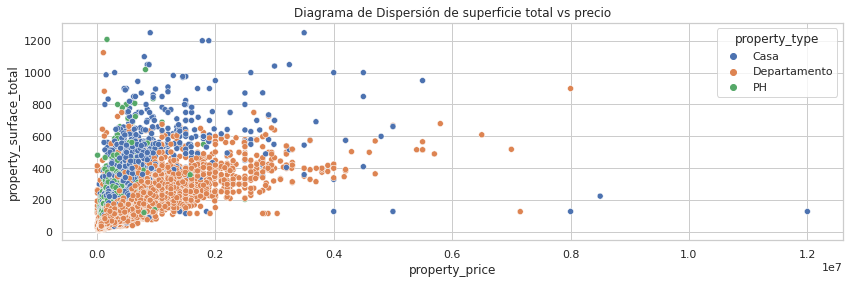

In [610]:
sns.scatterplot(x=df_filtrado['property_price'],y=df_filtrado['property_surface_total'], hue = df_filtrado['property_type'])
plt.title('Diagrama de Dispersión de superficie total vs precio')
plt.show()

In [611]:
df_filtrado.to_csv('./data/df_filtradov2.csv')

## Ejercicio 1d: Reducción de la Dimensionalidad

### Reducción de la dimensionalidad: en este punto se pide crear un nuevo dataset que resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al finalizar el prepocesamiento.

In [612]:
df_filtrado.dtypes

latitud                     float64
longitud                    float64
place_l3                     object
property_type                object
property_rooms                int64
property_bedrooms             int64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
dtype: object

### PCA

In [613]:
columnas_elegidas = ['latitud', 'longitud', 'property_rooms', 
                    'property_bedrooms', 'property_surface_total', 
                    'property_surface_covered', 'property_price'] 
x = df_filtrado.loc[:, columnas_elegidas].values 
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4) # n_components cantidad de columnas a las que se va a reducir
x_transformado = pca.fit_transform(x)
df_pca = pd.DataFrame(data = x_transformado, 
                          columns= ['cp_1', 'cp_2','cp_3','cp_4'])

pca.explained_variance_ratio_

array([0.55824986, 0.16539897, 0.13540156, 0.08425502])

Nos queda el 83,4% de varianza explicada en tres componentes.

In [614]:
pca.get_covariance()

array([[ 0.9981985 , -0.15125393, -0.0386432 , -0.0381136 , -0.00723277,
         0.00941808,  0.1622463 ],
       [-0.15125393,  0.99844055,  0.0030936 ,  0.00506741, -0.02890075,
         0.01997079,  0.10839859],
       [-0.0386432 ,  0.0030936 ,  1.02539236,  0.88843386,  0.76800961,
         0.77589726,  0.4825855 ],
       [-0.0381136 ,  0.00506741,  0.88843386,  1.01840025,  0.74255111,
         0.74977839,  0.44669047],
       [-0.00723277, -0.02890075,  0.76800961,  0.74255111,  0.99175448,
         0.87203174,  0.72778233],
       [ 0.00941808,  0.01997079,  0.77589726,  0.74977839,  0.87203174,
         1.02073198,  0.75516663],
       [ 0.1622463 ,  0.10839859,  0.4825855 ,  0.44669047,  0.72778233,
         0.75516663,  0.94716659]])

In [615]:
target = pd.DataFrame((np.column_stack(df_filtrado['property_type'])).tolist()).T 
df_pca_aux = pd.concat([df_pca, target], axis = 1)
df_pca_aux.columns= ['cp_1', 'cp_2','cp_3','cp_4','target']

df_pca_aux.tail(15)

,cp_1,cp_2,cp_3,cp_4,target
82627,-1.190603,1.412159,-0.384450,0.383408,Departamento
82628,-1.152318,1.346183,0.057460,0.247723,Departamento
82629,1.713987,1.259061,-0.436324,-0.054715,Departamento
82630,-1.798955,1.448435,-0.027985,0.308666,Departamento
82631,-0.088584,1.380793,-0.275612,-0.202704,Departamento
82632,-1.345861,0.951021,-0.348711,0.292873,Departamento
82633,-1.171295,-0.859605,-0.598418,0.798371,Departamento
82634,0.005031,-1.193733,-0.765867,0.260025,Departamento
82635,-0.259123,-1.873099,-0.239882,-0.040500,Departamento
82636,-1.771401,-1.668774,0.478524,0.522789,Departamento


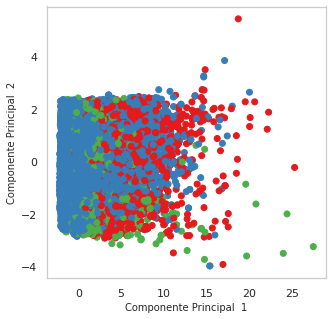

In [616]:
targets = df_filtrado['property_type'].unique()
# Unique category labels: 'Casa', 'PH', 'Departamento'
color_labels = df_pca_aux["target"].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set1", 57)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=df_pca['cp_1'],y=df_pca['cp_2'],c=df_pca_aux["target"].map(color_map))
ax.set_xlabel('Componente Principal  1', fontsize = 10)
ax.set_ylabel('Componente Principal  2', fontsize = 10)
ax.grid()

plt.show()

In [617]:
varianza_explicada=pca.explained_variance_ratio_
print(varianza_explicada)

[0.55824986 0.16539897 0.13540156 0.08425502]


In [618]:
varianza_explicada.cumsum()

array([0.55824986, 0.72364883, 0.85905039, 0.94330541])

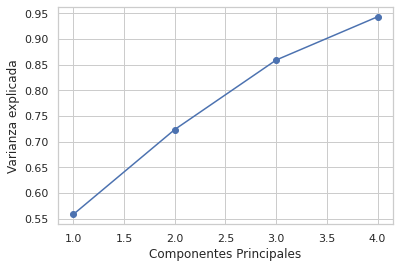

In [619]:
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada.cumsum(), '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

In [620]:
df_pca.to_csv("./data/properati_argentina_2021_pca.csv")

### t-SNE

In [621]:
df_tSNE = df_filtrado.copy()
df_tSNE.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.589974,-58.459133,Palermo,Casa,4,3,171.000000,133.0,210000.0
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0
3,-34.610027,-58.401934,Once,Departamento,4,2,135.327513,104.0,146000.0
4,-34.631621,-58.416825,Boedo,PH,4,2,106.415511,73.0,250000.0


In [622]:
features = ['latitud', 'longitud', 'property_rooms', 
            'property_bedrooms', 'property_surface_total', 
            'property_surface_covered', 'property_price']

x = df_tSNE.loc[:, features].values

y = df_tSNE.loc[:, ['property_type']].values

color = df_tSNE.property_type.map(color_map)

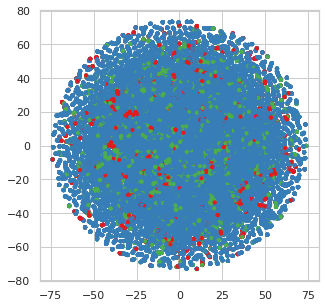

In [623]:
X_tsne = TSNE(n_components=2, perplexity=10).fit_transform(x)    #learning_rate n_iter init
  
fig1 = plt.figure(figsize=(5,5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker='o', s=10)

plt.show()

In [624]:
#X_tsne.to_csv("tsne.csv")
pd_tsne = pd.DataFrame(X_tsne)
pd_tsne.to_csv("tsne_predicted")

### MDS y PCoA

In [625]:
x_sr, color_sr = datasets.make_swiss_roll(n_samples=1500) # ELIMINAR COMENTARIO en pc personal llegue a probar hasta 6000 y se la banca
embedding = MDS(n_components=2,metric=True,dissimilarity="euclidean")
mds_transformation = embedding.fit_transform(x_sr)

n = 1

In [626]:
print(embedding.stress_)

11974497.60840413


n = 2

In [627]:
print(embedding.stress_)

11974497.60840413


n = 3

In [628]:
print(embedding.stress_)

11974497.60840413


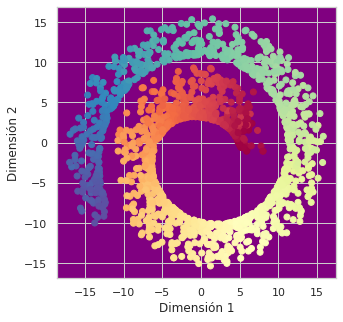

In [629]:
fig1 = plt.figure(figsize=(5, 5), facecolor='white')

ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('purple')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')

plt.scatter(
    mds_transformation[:, 0],
    mds_transformation[:, 1],
    c=color_sr,
    marker='o',
    cmap=plt.cm.Spectral,
)

plt.show()

### ISOMAP

In [630]:
iso = Isomap(n_neighbors=15, n_components=2)
iso.fit(x_sr)
manifold_2Da = iso.transform(x_sr)

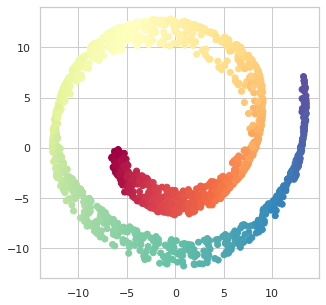

: 

In [631]:
iso = Isomap(n_neighbors=450, n_components=2)
iso.fit(x_sr)
manifold_2Da = iso.transform(x_sr)
fig1 = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color_sr, marker='o', cmap=plt.cm.Spectral
)


plt.show()